<img src="image_covid.png" style="height:300px">
_____________________________________________________________________________________________________________________________

# Artificial Neural Network

# PART 1: Data Preprocessing 

In [20]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.1.0'

In [21]:
# Importing the dataset
dataset = pd.read_csv('symptom_frequency.csv')
X = dataset.iloc[:,:20].values 
y = dataset.iloc[:, -1].values 

display(dataset.head())
print('');
dataset.info()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
Breathing Problem                          5434 non-null object
Fever                                      5434 non-null object
Dry Cough                                  5434 non-null object
Sore throat                                5434 non-null object
Running Nose                               5434 non-null object
Asthma                                     5434 non-null object
Chronic Lung Disease                       5434 non-null object
Headache                                   5434 non-null object
Heart Disease                              5434 non-null object
Diabetes                                   5434 non-null object
Hyper Tension                              5434 non-null object
Fatigue                                    5434 non-null object
Gastrointestinal                           5434 non-null object
Abroad travel                              5434 non-null obj

In [22]:
dataset['COVID-19'].value_counts(normalize=True)

Yes    0.806588
No     0.193412
Name: COVID-19, dtype: float64

# ENCODING CATEGORICAL DATA

In [95]:
# Label Encoding to binary column, from Yes/no -> 1/0
# X's
i = 0
for i in dataset.columns:
    dataset[i] = dataset[i].replace('No', 0).replace('Yes', 1)

X = dataset[[x for x in dataset.columns if x not in 'COVID-19']]

# y
y = dataset['COVID-19'].replace('No', 0).replace('Yes',1)

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize object
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.3)

# Create indexes 
train_index, test_index = next(sss.split(X, y))

# Assign set
X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

# PART 2: Building the ANN

In [97]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# PART 3: Training the ANN

In [98]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [99]:
# Training the ANN on the Training set
ann.fit(X_train.values, y_train.values, batch_size = 32, epochs = 100)

Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 1s 140us/sample - loss: 0.6985 - accuracy: 0.5582
Epoch 2/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.4764 - accuracy: 0.8209
Epoch 3/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3179 - accuracy: 0.8641
Epoch 4/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.2328 - accuracy: 0.9082
Epoch 5/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.1827 - accuracy: 0.9253
Epoch 6/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.1536 - accuracy: 0.9422
Epoch 7/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.1355 - accuracy: 0.9493
Epoch 8/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.1226 - accuracy: 0.9556
Epoch 9/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.1135 - accuracy: 0.9603
Epoch 10/100
3803/3803 

3803/3803 [==============================] - 0s 49us/sample - loss: 0.0560 - accuracy: 0.9761
Epoch 78/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0558 - accuracy: 0.9755
Epoch 79/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0552 - accuracy: 0.9774
Epoch 80/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0555 - accuracy: 0.9742
Epoch 81/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0550 - accuracy: 0.9753
Epoch 82/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0547 - accuracy: 0.9784
Epoch 83/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0551 - accuracy: 0.9755
Epoch 84/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0549 - accuracy: 0.9742
Epoch 85/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0548 - accuracy: 0.9748
Epoch 86/100
3803/3803 [==========================

# PART 4: Making the predictions

In [100]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred

array([[9.9999702e-01],
       [9.9999714e-01],
       [9.9997687e-01],
       ...,
       [3.2578103e-04],
       [9.9999988e-01],
       [9.9967444e-01]], dtype=float32)

# PART 5: Interpreting

In [101]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_cm = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred_cm)
print(cm)

[[ 302   13]
 [  15 1301]]


Precision = tp / tp + fp, measuring how many true positives it predicted out of all predicted positives
Recall = tp / tp + + fn, measuring how many true positives it predicted out of all positives 
F1-score 2 * (Precision + Recall) / Precision + Recall, pretty much just balances the metrics

In [102]:
# Classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

print(classification_report(y_test, y_pred_cm))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       315
           1       0.99      0.99      0.99      1316

    accuracy                           0.98      1631
   macro avg       0.97      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631



It seems it predicts positive too often. However, this is preferable in the COVID situation

In [103]:
# Correct vs wrong, index of wrongs to compare what went wrong 
correct = 0
wrong = 0
index_of_wrongs = []
i = 0

#looping
for j in y_pred_cm:
    ii = y_test.index[i]
    if (j == True) and (y_test[ii] == 1):
        correct += 1
    elif (j == False) and (y_test[ii] == 0):
        correct += 1
    elif (j == True) and (y_test[ii] == 0):
        wrong += 1
        index_of_wrongs.append(ii)
    elif (j== False) and (y_test[ii] ==1):
        wrong += 1
        index_of_wrongs.append(ii)
    i += 1
    
# Inspect it  
index_of_wrongs;

# PART 6: Saving and loading model

In [104]:
# Save model 
ann.save('Covid_model_2021')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Covid_model_2021\assets


In [105]:
# Load model
from tensorflow import keras 

loaded_model = keras.models.load_model('Covid_model_2021')

In [108]:
# Trying it out
y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5) # MAYBE LEAVE THIS PART OUT, SO WE GET PROBABILITIES 

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: inputs=      Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
3581                  0      1          1            0             0       0   
1861                  1      1          1            1             0       1   
3216                  1      1          1            0             0       0   
4621                  1      0          0            0             0       1   
4080                  0      0          0            0             1       0   
...                 ...    ...        ...          ...           ...     ...   
512                   1      1          1            1             1       0   
1789                  1      1          1            1             1       0   
4435                  0      0          1            0             0       0   
1014                  1      1          1            1             1       0   
5165                  0      1          0            1             1       0   

      Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
3581                     1         1              0         0              1   
1861                     0         1              1         0              0   
3216                     1         0              1         1              1   
4621                     1         0              1         1              1   
4080                     1         0              1         1              0   
...                    ...       ...            ...       ...            ...   
512                      0         1              0         1              1   
1789                     0         1              0         0              0   
4435                     0         0              1         0              1   
1014                     1         1              0         1              0   
5165                     1         0              0         1              1   

      Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
3581         0                  0              1                           1   
1861         1                  0              0                           1   
3216         1                  1              0                           0   
4621         0                  0              0                           0   
4080         0                  1              0                           1   
...        ...                ...            ...                         ...   
512          1                  1              1                           0   
1789         0                  0              0                           0   
4435         1                  0              0                           0   
1014         1                  0              1                           1   
5165         0                  0              0                           1   

      Attended Large Gathering  Visited Public Exposed Places  \
3581                         0                              0   
1861                         1                              1   
3216                         1                              1   
4621                         0                              1   
4080                         0                              0   
...                        ...                            ...   
512                          0                              1   
1789                         1                              1   
4435                         0                              0   
1014                         0                              1   
5165                         1                              1   

      Family working in Public Exposed Places  Wearing Masks  \
3581                                        1              0   
1861                                        1              0   
3216                                        1              0   
4621                                        0              0   
4080                                        1              0   
...                                       ...            ...   
512                                         1              0   
1789                                        1              0   
4435                                        1              0   
1014                                        1              0   
5165                                        0              0   

      Sanitization from Market  
3581                         0  
1861                         0  
3216                         0  
4621                         0  
4080                         0  
...                        ...  
512                          0  
1789                         0  
4435                         0  
1014                         0  
5165                         0  

[1631 rows x 20 columns]

In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

______

# Appendix A: Hyperparameter search

In [35]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

# Importing the dataset
dataset = pd.read_csv('symptom_frequency.csv')
X = dataset.iloc[:,:20].values 
y = dataset.iloc[:, -1].values 

# Label Encoding to binary column, from Yes/no -> 1/0
i = 0
for i in dataset.columns:
    dataset[i] = dataset[i].replace('No', 0).replace('Yes', 1)
X = dataset[[x for x in dataset.columns if x not in 'COVID-19']]
y = dataset['COVID-19'].replace('No', 0).replace('Yes',1)

# Train test split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.3) 
train_index, test_index = next(sss.split(X, y))

# Assign set
X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn import metrics

ann_versions_list = list()
ann_versions_dict = dict() 

# ANN CREATION AND PREDICTION
def make_ann_predict(optimizer = 'adam', loss = 'binary_crossentropy',
                     epochs = 10, batch_size = 32, positive_limit = 0.7,
                     description = ''):
    
    # ANN
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = optimizer, loss = loss, metrics = ['Accuracy'])
    ann.fit(X_train.values, y_train.values, batch_size = batch_size, epochs = epochs)
    y_pred = ann.predict(X_test)
    
    # METRICS
    y_pred_binary = (y_pred > positive_limit)
    if description not in ann_versions_dict.keys():
        ann_versions_list.append(description)
        ann_versions_dict[description]  = y_pred_binary 

# Metrics to try out 
optimizer_list = ['Adam', 'SGD', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
epochs_list = list(range(50, 200, 50))
positive_limit_list = list(np.arange(0.0, 1.1, 0.25))

In [51]:
# Run the models 
for limit in positive_limit_list:
    for epochs in epochs_list:
        for optimizer in optimizer_list:
            make_ann_predict(optimizer = optimizer, epochs = epochs, positive_limit = limit, description =f'{optimizer}, binary crossentropy, {epochs} epochs, 32 batchsize, {limit} limit' )

Train on 3803 samples
Epoch 1/50
3803/3803 [==============================] - 1s 217us/sample - loss: 0.5828 - Accuracy: 0.0000e+00
Epoch 2/50
3803/3803 [==============================] - 0s 63us/sample - loss: 0.3958 - Accuracy: 0.0000e+00
Epoch 3/50
3803/3803 [==============================] - 0s 63us/sample - loss: 0.2877 - Accuracy: 0.0000e+00
Epoch 4/50
3803/3803 [==============================] - 0s 67us/sample - loss: 0.1816 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 71us/sample - loss: 0.1314 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 57us/sample - loss: 0.1094 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0988 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0917 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0859 - Accuracy: 0.0000e

3803/3803 [==============================] - 0s 43us/sample - loss: 0.1096 - Accuracy: 0.0000e+00
Epoch 26/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.1064 - Accuracy: 0.0000e+00
Epoch 27/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1038 - Accuracy: 0.0000e+00
Epoch 28/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.1015 - Accuracy: 0.0000e+00
Epoch 29/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0994 - Accuracy: 0.0000e+00
Epoch 30/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0974 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0957 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0939 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0927 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 

3803/3803 [==============================] - 0s 43us/sample - loss: 0.5079 - Accuracy: 0.0000e+00
Epoch 50/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.5071 - Accuracy: 0.0000e+00
Train on 3803 samples
Epoch 1/50
3803/3803 [==============================] - 0s 117us/sample - loss: 0.6351 - Accuracy: 0.0000e+00
Epoch 2/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5784 - Accuracy: 0.0000e+00
Epoch 3/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.5462 - Accuracy: 0.0000e+00
Epoch 4/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5219 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5020 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 41us/sample - loss: 0.4861 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 39us/sample - loss: 0.4731 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 50us/sample - loss: 0.1086 - Accuracy: 0.0000e+00
Epoch 24/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.1053 - Accuracy: 0.0000e+00
Epoch 25/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1022 - Accuracy: 0.0000e+00
Epoch 26/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0997 - Accuracy: 0.0000e+00
Epoch 27/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0973 - Accuracy: 0.0000e+00
Epoch 28/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0953 - Accuracy: 0.0000e+00
Epoch 29/50
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0935 - Accuracy: 0.0000e+00
Epoch 30/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0917 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0902 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 

3803/3803 [==============================] - 0s 57us/sample - loss: 0.0483 - Accuracy: 0.3455
Epoch 49/50
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0481 - Accuracy: 0.3476
Epoch 50/50
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0484 - Accuracy: 0.3608
Train on 3803 samples
Epoch 1/50
3803/3803 [==============================] - 0s 117us/sample - loss: 0.6896 - Accuracy: 0.0000e+00
Epoch 2/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6861 - Accuracy: 0.0000e+00
Epoch 3/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6838 - Accuracy: 0.0000e+00
Epoch 4/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6820 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6804 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6790 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0710 - Accuracy: 0.0000e+00
Epoch 23/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0696 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0687 - Accuracy: 0.0000e+00
Epoch 25/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0663 - Accuracy: 0.0000e+00
Epoch 26/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0663 - Accuracy: 0.0000e+00
Epoch 27/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0652 - Accuracy: 0.0000e+00
Epoch 28/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0649 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0639 - Accuracy: 0.0000e+00
Epoch 30/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0629 - Accuracy: 0.0053
Epoch 31/100
3803/

3803/3803 [==============================] - 0s 112us/sample - loss: 0.0441 - Accuracy: 0.4141
Epoch 99/100
3803/3803 [==============================] - 1s 145us/sample - loss: 0.0432 - Accuracy: 0.4205
Epoch 100/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0445 - Accuracy: 0.4252
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 1s 153us/sample - loss: 0.4951 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.4023 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 93us/sample - loss: 0.3626 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 105us/sample - loss: 0.3283 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 109us/sample - loss: 0.2965 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - 0s 96us/sample - loss: 0.2679 - Accuracy: 0.0000e+00
Epoc

3803/3803 [==============================] - 0s 40us/sample - loss: 0.0663 - Accuracy: 0.0907
Epoch 72/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0657 - Accuracy: 0.1031
Epoch 73/100
3803/3803 [==============================] - 0s 38us/sample - loss: 0.0655 - Accuracy: 0.1070
Epoch 74/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0652 - Accuracy: 0.1149
Epoch 75/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0651 - Accuracy: 0.1194
Epoch 76/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0648 - Accuracy: 0.1252
Epoch 77/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0647 - Accuracy: 0.1291
Epoch 78/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0639 - Accuracy: 0.1336
Epoch 79/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.0641 - Accuracy: 0.1325
Epoch 80/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 43us/sample - loss: 0.6606 - Accuracy: 0.0000e+00
Epoch 46/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6586 - Accuracy: 0.0000e+00
Epoch 47/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6567 - Accuracy: 0.0000e+00
Epoch 48/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.6547 - Accuracy: 0.0000e+00
Epoch 49/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6527 - Accuracy: 0.0000e+00
Epoch 50/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6508 - Accuracy: 0.0000e+00
Epoch 51/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.6489 - Accuracy: 0.0000e+00
Epoch 52/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6470 - Accuracy: 0.0000e+00
Epoch 53/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.6451 - Accuracy: 0.0000e+00
Epoch 54/100
3

3803/3803 [==============================] - 0s 44us/sample - loss: 0.3831 - Accuracy: 0.0000e+00
Epoch 19/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3817 - Accuracy: 0.0000e+00
Epoch 20/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3803 - Accuracy: 0.0000e+00
Epoch 21/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3789 - Accuracy: 0.0000e+00
Epoch 22/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3776 - Accuracy: 0.0000e+00
Epoch 23/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3764 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3752 - Accuracy: 0.0000e+00
Epoch 25/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.3740 - Accuracy: 0.0000e+00
Epoch 26/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.3729 - Accuracy: 0.0000e+00
Epoch 27/100
3

3803/3803 [==============================] - 0s 43us/sample - loss: 0.3253 - Accuracy: 0.0000e+00
Epoch 92/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3248 - Accuracy: 0.0000e+00
Epoch 93/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3243 - Accuracy: 0.0000e+00
Epoch 94/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3238 - Accuracy: 0.0000e+00
Epoch 95/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3233 - Accuracy: 0.0000e+00
Epoch 96/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.3227 - Accuracy: 0.0000e+00
Epoch 97/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3222 - Accuracy: 0.0000e+00
Epoch 98/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.3217 - Accuracy: 0.0000e+00
Epoch 99/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.3212 - Accuracy: 0.0000e+00
Epoch 100/100


3803/3803 [==============================] - 0s 49us/sample - loss: 0.0589 - Accuracy: 0.1883
Epoch 66/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0587 - Accuracy: 0.1943
Epoch 67/100
3803/3803 [==============================] - 0s 59us/sample - loss: 0.0586 - Accuracy: 0.2027
Epoch 68/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0581 - Accuracy: 0.2046
Epoch 69/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0583 - Accuracy: 0.2117
Epoch 70/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0577 - Accuracy: 0.2114
Epoch 71/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0575 - Accuracy: 0.2235
Epoch 72/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0575 - Accuracy: 0.2267
Epoch 73/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0570 - Accuracy: 0.2275
Epoch 74/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 46us/sample - loss: 0.0527 - Accuracy: 0.1283
Epoch 41/100
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0519 - Accuracy: 0.1457
Epoch 42/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0518 - Accuracy: 0.1586
Epoch 43/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0514 - Accuracy: 0.1709
Epoch 44/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0510 - Accuracy: 0.1751
Epoch 45/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0502 - Accuracy: 0.1904
Epoch 46/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0509 - Accuracy: 0.1985
Epoch 47/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0501 - Accuracy: 0.2201
Epoch 48/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0493 - Accuracy: 0.2306
Epoch 49/100
3803/3803 [==========================

Epoch 16/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.6680 - Accuracy: 0.0000e+00
Epoch 17/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.6671 - Accuracy: 0.0000e+00
Epoch 18/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6662 - Accuracy: 0.0000e+00
Epoch 19/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6654 - Accuracy: 0.0000e+00
Epoch 20/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6645 - Accuracy: 0.0000e+00
Epoch 21/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6637 - Accuracy: 0.0000e+00
Epoch 22/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6629 - Accuracy: 0.0000e+00
Epoch 23/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6621 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.6612 - Accuracy: 0.0000e+00
E

3803/3803 [==============================] - 0s 45us/sample - loss: 0.5645 - Accuracy: 0.0000e+00
Epoch 90/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5616 - Accuracy: 0.0000e+00
Epoch 91/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.5588 - Accuracy: 0.0000e+00
Epoch 92/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5558 - Accuracy: 0.0000e+00
Epoch 93/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.5529 - Accuracy: 0.0000e+00
Epoch 94/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5500 - Accuracy: 0.0000e+00
Epoch 95/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.5470 - Accuracy: 0.0000e+00
Epoch 96/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.5440 - Accuracy: 0.0000e+00
Epoch 97/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5410 - Accuracy: 0.0000e+00
Epoch 98/100
3

3803/3803 [==============================] - 0s 47us/sample - loss: 0.0412 - Accuracy: 0.1586
Epoch 64/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0410 - Accuracy: 0.1604
Epoch 65/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0406 - Accuracy: 0.1628
Epoch 66/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0410 - Accuracy: 0.1680
Epoch 67/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0413 - Accuracy: 0.1733
Epoch 68/150
3803/3803 [==============================] - 0s 70us/sample - loss: 0.0403 - Accuracy: 0.1849
Epoch 69/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0408 - Accuracy: 0.1856
Epoch 70/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0406 - Accuracy: 0.1941
Epoch 71/150
3803/3803 [==============================] - 0s 64us/sample - loss: 0.0404 - Accuracy: 0.1933
Epoch 72/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0380 - Accuracy: 0.4383
Epoch 139/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0377 - Accuracy: 0.4381
Epoch 140/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0387 - Accuracy: 0.4375
Epoch 141/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0381 - Accuracy: 0.4381
Epoch 142/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0383 - Accuracy: 0.4425
Epoch 143/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0386 - Accuracy: 0.4431
Epoch 144/150
3803/3803 [==============================] - 0s 78us/sample - loss: 0.0371 - Accuracy: 0.4441
Epoch 145/150
3803/3803 [==============================] - 0s 72us/sample - loss: 0.0377 - Accuracy: 0.4433
Epoch 146/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0378 - Accuracy: 0.4491
Epoch 147/150
3803/3803 [=================

3803/3803 [==============================] - 0s 48us/sample - loss: 0.0914 - Accuracy: 0.0121
Epoch 62/150
3803/3803 [==============================] - 0s 60us/sample - loss: 0.0909 - Accuracy: 0.0221
Epoch 63/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0904 - Accuracy: 0.0323
Epoch 64/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0900 - Accuracy: 0.0415
Epoch 65/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0895 - Accuracy: 0.0387
Epoch 66/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0891 - Accuracy: 0.0415
Epoch 67/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0887 - Accuracy: 0.0415
Epoch 68/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0878 - Accuracy: 0.0415
Epoch 69/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0880 - Accuracy: 0.0421
Epoch 70/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 45us/sample - loss: 0.0720 - Accuracy: 0.2235
Epoch 138/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0722 - Accuracy: 0.2204
Epoch 139/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0724 - Accuracy: 0.2246
Epoch 140/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0719 - Accuracy: 0.2277
Epoch 141/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0720 - Accuracy: 0.2335
Epoch 142/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0717 - Accuracy: 0.2335
Epoch 143/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0718 - Accuracy: 0.2296
Epoch 144/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0712 - Accuracy: 0.2380
Epoch 145/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0710 - Accuracy: 0.2401
Epoch 146/150
3803/3803 [=================

3803/3803 [==============================] - 0s 62us/sample - loss: 1.6743 - Accuracy: 0.0000e+00
Epoch 62/150
3803/3803 [==============================] - 0s 52us/sample - loss: 1.6657 - Accuracy: 0.0000e+00
Epoch 63/150
3803/3803 [==============================] - 0s 54us/sample - loss: 1.6572 - Accuracy: 0.0000e+00
Epoch 64/150
3803/3803 [==============================] - 0s 47us/sample - loss: 1.6487 - Accuracy: 0.0000e+00
Epoch 65/150
3803/3803 [==============================] - 0s 52us/sample - loss: 1.6402 - Accuracy: 0.0000e+00
Epoch 66/150
3803/3803 [==============================] - 0s 44us/sample - loss: 1.6318 - Accuracy: 0.0000e+00
Epoch 67/150
3803/3803 [==============================] - 0s 45us/sample - loss: 1.6234 - Accuracy: 0.0000e+00
Epoch 68/150
3803/3803 [==============================] - 0s 61us/sample - loss: 1.6151 - Accuracy: 0.0000e+00
Epoch 69/150
3803/3803 [==============================] - 0s 54us/sample - loss: 1.6068 - Accuracy: 0.0000e+00
Epoch 70/150
3

3803/3803 [==============================] - 0s 43us/sample - loss: 1.1877 - Accuracy: 0.0000e+00
Epoch 134/150
3803/3803 [==============================] - 0s 44us/sample - loss: 1.1827 - Accuracy: 0.0000e+00
Epoch 135/150
3803/3803 [==============================] - 0s 47us/sample - loss: 1.1777 - Accuracy: 0.0000e+00
Epoch 136/150
3803/3803 [==============================] - 0s 59us/sample - loss: 1.1728 - Accuracy: 0.0000e+00
Epoch 137/150
3803/3803 [==============================] - 0s 57us/sample - loss: 1.1679 - Accuracy: 0.0000e+00
Epoch 138/150
3803/3803 [==============================] - 0s 56us/sample - loss: 1.1630 - Accuracy: 0.0000e+00
Epoch 139/150
3803/3803 [==============================] - 0s 49us/sample - loss: 1.1583 - Accuracy: 0.0000e+00
Epoch 140/150
3803/3803 [==============================] - 0s 50us/sample - loss: 1.1535 - Accuracy: 0.0000e+00
Epoch 141/150
3803/3803 [==============================] - 0s 51us/sample - loss: 1.1489 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 49us/sample - loss: 0.3765 - Accuracy: 0.0000e+00
Epoch 57/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.3755 - Accuracy: 0.0000e+00
Epoch 58/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.3746 - Accuracy: 0.0000e+00
Epoch 59/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.3737 - Accuracy: 0.0000e+00
Epoch 60/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.3727 - Accuracy: 0.0000e+00
Epoch 61/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.3718 - Accuracy: 0.0000e+00
Epoch 62/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3709 - Accuracy: 0.0000e+00
Epoch 63/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3700 - Accuracy: 0.0000e+00
Epoch 64/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3691 - Accuracy: 0.0000e+00
Epoch 65/150
3

3803/3803 [==============================] - 0s 44us/sample - loss: 0.3166 - Accuracy: 0.0000e+00
Epoch 130/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3159 - Accuracy: 0.0000e+00
Epoch 131/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.3152 - Accuracy: 0.0000e+00
Epoch 132/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3146 - Accuracy: 0.0000e+00
Epoch 133/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.3139 - Accuracy: 0.0000e+00
Epoch 134/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.3132 - Accuracy: 0.0000e+00
Epoch 135/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.3125 - Accuracy: 0.0000e+00
Epoch 136/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.3118 - Accuracy: 0.0000e+00
Epoch 137/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.3112 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0691 - Accuracy: 0.0000e+00
Epoch 53/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0688 - Accuracy: 0.0000e+00
Epoch 54/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0683 - Accuracy: 0.0039
Epoch 55/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0683 - Accuracy: 0.0063
Epoch 56/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0678 - Accuracy: 0.0063
Epoch 57/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0674 - Accuracy: 0.0068
Epoch 58/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0669 - Accuracy: 0.0074
Epoch 59/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0666 - Accuracy: 0.0074
Epoch 60/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0664 - Accuracy: 0.0074
Epoch 61/150
3803/3803 [==================

3803/3803 [==============================] - 0s 54us/sample - loss: 0.0525 - Accuracy: 0.4212
Epoch 129/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0523 - Accuracy: 0.4239
Epoch 130/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0524 - Accuracy: 0.4228
Epoch 131/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0520 - Accuracy: 0.4247
Epoch 132/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0522 - Accuracy: 0.4247
Epoch 133/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0520 - Accuracy: 0.4262
Epoch 134/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0515 - Accuracy: 0.4268
Epoch 135/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0517 - Accuracy: 0.4276
Epoch 136/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0513 - Accuracy: 0.4276
Epoch 137/150
3803/3803 [=================

3803/3803 [==============================] - 0s 54us/sample - loss: 0.0749 - Accuracy: 0.0216
Epoch 53/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0740 - Accuracy: 0.0273
Epoch 54/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0739 - Accuracy: 0.0329
Epoch 55/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0732 - Accuracy: 0.0342
Epoch 56/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0734 - Accuracy: 0.0360
Epoch 57/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0727 - Accuracy: 0.0458
Epoch 58/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0739 - Accuracy: 0.0476
Epoch 59/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0734 - Accuracy: 0.0581
Epoch 60/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0731 - Accuracy: 0.0647
Epoch 61/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 47us/sample - loss: 0.0689 - Accuracy: 0.2790
Epoch 129/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0687 - Accuracy: 0.2811
Epoch 130/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0687 - Accuracy: 0.2816
Epoch 131/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0688 - Accuracy: 0.2829
Epoch 132/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0692 - Accuracy: 0.2845
Epoch 133/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0682 - Accuracy: 0.2850
Epoch 134/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0685 - Accuracy: 0.2911
Epoch 135/150
3803/3803 [==============================] - 0s 64us/sample - loss: 0.0689 - Accuracy: 0.2924s - loss: 0.0651 - Accuracy: 0.
Epoch 136/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0684 - Accuracy: 0.2937
Epoch 137/1

3803/3803 [==============================] - 0s 45us/sample - loss: 0.6478 - Accuracy: 0.0000e+00
Epoch 53/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6472 - Accuracy: 0.0000e+00
Epoch 54/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6467 - Accuracy: 0.0000e+00
Epoch 55/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6462 - Accuracy: 0.0000e+00
Epoch 56/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.6456 - Accuracy: 0.0000e+00
Epoch 57/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.6451 - Accuracy: 0.0000e+00
Epoch 58/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.6446 - Accuracy: 0.0000e+00
Epoch 59/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6440 - Accuracy: 0.0000e+00
Epoch 60/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6435 - Accuracy: 0.0000e+00
Epoch 61/150
3

3803/3803 [==============================] - 0s 79us/sample - loss: 0.6026 - Accuracy: 0.0000e+00
Epoch 126/150
3803/3803 [==============================] - 0s 72us/sample - loss: 0.6016 - Accuracy: 0.0000e+00
Epoch 127/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.6007 - Accuracy: 0.0000e+00
Epoch 128/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.5996 - Accuracy: 0.0000e+00
Epoch 129/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.5986 - Accuracy: 0.0000e+00
Epoch 130/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.5976 - Accuracy: 0.0000e+00
Epoch 131/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.5965 - Accuracy: 0.0000e+00
Epoch 132/150
3803/3803 [==============================] - 0s 78us/sample - loss: 0.5954 - Accuracy: 0.0000e+00
Epoch 133/150
3803/3803 [==============================] - 0s 70us/sample - loss: 0.5943 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 52us/sample - loss: 0.0727 - Accuracy: 0.2385
Train on 3803 samples
Epoch 1/50
3803/3803 [==============================] - 0s 127us/sample - loss: 0.6358 - Accuracy: 0.0000e+00
Epoch 2/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5189 - Accuracy: 0.0000e+00
Epoch 3/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.4593 - Accuracy: 0.0000e+00
Epoch 4/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.4355 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.4224 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.4097 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3955 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.3796 - Accuracy: 0.0000e+00
Epoch 9/50


3803/3803 [==============================] - 0s 54us/sample - loss: 0.6849 - Accuracy: 0.0000e+00
Epoch 25/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6836 - Accuracy: 0.0000e+00
Epoch 26/50
3803/3803 [==============================] - 0s 53us/sample - loss: 0.6823 - Accuracy: 0.0000e+00
Epoch 27/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6810 - Accuracy: 0.0000e+00
Epoch 28/50
3803/3803 [==============================] - 0s 41us/sample - loss: 0.6797 - Accuracy: 0.0000e+00
Epoch 29/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6783 - Accuracy: 0.0000e+00
Epoch 30/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6770 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6757 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6743 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 

3803/3803 [==============================] - 0s 45us/sample - loss: 0.4413 - Accuracy: 0.0000e+00
Epoch 49/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.4396 - Accuracy: 0.0000e+00
Epoch 50/50
3803/3803 [==============================] - 0s 55us/sample - loss: 0.4378 - Accuracy: 0.0000e+00
Train on 3803 samples
Epoch 1/50
3803/3803 [==============================] - 1s 135us/sample - loss: 0.7050 - Accuracy: 0.0000e+00
Epoch 2/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5912 - Accuracy: 0.0000e+00
Epoch 3/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.5041 - Accuracy: 0.0000e+00
Epoch 4/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.4560 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 41us/sample - loss: 0.4314 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.4123 - Accuracy: 0.0000e+00
Epoch

3803/3803 [==============================] - 0s 45us/sample - loss: 0.0599 - Accuracy: 0.0841
Epoch 23/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0584 - Accuracy: 0.0970
Epoch 24/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0580 - Accuracy: 0.1260
Epoch 25/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0572 - Accuracy: 0.1375
Epoch 26/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0560 - Accuracy: 0.1449
Epoch 27/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0556 - Accuracy: 0.1693
Epoch 28/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0548 - Accuracy: 0.1862
Epoch 29/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0544 - Accuracy: 0.1977
Epoch 30/50
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0541 - Accuracy: 0.2083
Epoch 31/50
3803/3803 [==============================] - 0

3803/3803 [==============================] - 0s 45us/sample - loss: 0.6485 - Accuracy: 0.0000e+00
Epoch 48/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6478 - Accuracy: 0.0000e+00
Epoch 49/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6471 - Accuracy: 0.0000e+00
Epoch 50/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6464 - Accuracy: 0.0000e+00
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 1s 172us/sample - loss: 0.5748 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3737 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.2990 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.2201 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1611 - Accuracy: 0.0000e+00

3803/3803 [==============================] - 0s 47us/sample - loss: 0.0566 - Accuracy: 0.2169
Epoch 73/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0563 - Accuracy: 0.2198
Epoch 74/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0555 - Accuracy: 0.2230
Epoch 75/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0554 - Accuracy: 0.2243
Epoch 76/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0540 - Accuracy: 0.2267
Epoch 77/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0533 - Accuracy: 0.2395
Epoch 78/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0526 - Accuracy: 0.2422
Epoch 79/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0516 - Accuracy: 0.2414
Epoch 80/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0522 - Accuracy: 0.2472
Epoch 81/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 49us/sample - loss: 0.0775 - Accuracy: 0.0484
Epoch 48/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0772 - Accuracy: 0.0694
Epoch 49/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0770 - Accuracy: 0.0742
Epoch 50/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0767 - Accuracy: 0.0794
Epoch 51/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0764 - Accuracy: 0.0807
Epoch 52/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0760 - Accuracy: 0.0839
Epoch 53/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0760 - Accuracy: 0.0873
Epoch 54/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0756 - Accuracy: 0.0910
Epoch 55/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0753 - Accuracy: 0.0999
Epoch 56/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 50us/sample - loss: 0.8060 - Accuracy: 0.0000e+00
Epoch 23/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.8043 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.8026 - Accuracy: 0.0000e+00
Epoch 25/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.8009 - Accuracy: 0.0000e+00
Epoch 26/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.7993 - Accuracy: 0.0000e+00
Epoch 27/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.7976 - Accuracy: 0.0000e+00
Epoch 28/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.7959 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.7943 - Accuracy: 0.0000e+00
Epoch 30/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.7926 - Accuracy: 0.0000e+00
Epoch 31/100
3

3803/3803 [==============================] - 0s 43us/sample - loss: 0.7076 - Accuracy: 0.0000e+00
Epoch 96/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.7066 - Accuracy: 0.0000e+00
Epoch 97/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.7057 - Accuracy: 0.0000e+00
Epoch 98/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.7047 - Accuracy: 0.0000e+00
Epoch 99/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.7038 - Accuracy: 0.0000e+00
Epoch 100/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.7029 - Accuracy: 0.0000e+00
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 0s 128us/sample - loss: 0.6387 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6007 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5745 - Accuracy: 0.00

3803/3803 [==============================] - 0s 52us/sample - loss: 0.3287 - Accuracy: 0.0000e+00
Epoch 69/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.3278 - Accuracy: 0.0000e+00
Epoch 70/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.3270 - Accuracy: 0.0000e+00
Epoch 71/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3261 - Accuracy: 0.0000e+00
Epoch 72/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3252 - Accuracy: 0.0000e+00
Epoch 73/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.3244 - Accuracy: 0.0000e+00
Epoch 74/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3235 - Accuracy: 0.0000e+00
Epoch 75/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3227 - Accuracy: 0.0000e+00
Epoch 76/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.3219 - Accuracy: 0.0000e+00
Epoch 77/100
3

3803/3803 [==============================] - 0s 48us/sample - loss: 0.0757 - Accuracy: 0.0957
Epoch 43/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0752 - Accuracy: 0.1081
Epoch 44/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0747 - Accuracy: 0.1136
Epoch 45/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0738 - Accuracy: 0.1423
Epoch 46/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0736 - Accuracy: 0.1475
Epoch 47/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0726 - Accuracy: 0.1596
Epoch 48/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0725 - Accuracy: 0.1641
Epoch 49/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0719 - Accuracy: 0.1746
Epoch 50/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0711 - Accuracy: 0.1783
Epoch 51/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 60us/sample - loss: 0.0772 - Accuracy: 0.0000e+00
Epoch 18/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0769 - Accuracy: 0.0000e+00
Epoch 19/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0757 - Accuracy: 0.0000e+00
Epoch 20/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0749 - Accuracy: 0.0000e+00
Epoch 21/100
3803/3803 [==============================] - 0s 59us/sample - loss: 0.0739 - Accuracy: 0.0000e+00
Epoch 22/100
3803/3803 [==============================] - 0s 60us/sample - loss: 0.0729 - Accuracy: 0.0000e+00
Epoch 23/100
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0728 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 61us/sample - loss: 0.0718 - Accuracy: 0.0016
Epoch 25/100
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0712 - Accuracy: 0.0039
Epoch 26/100
3803/3803

3803/3803 [==============================] - 0s 65us/sample - loss: 0.0611 - Accuracy: 0.3587
Epoch 94/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.0613 - Accuracy: 0.3608
Epoch 95/100
3803/3803 [==============================] - 0s 77us/sample - loss: 0.0618 - Accuracy: 0.3631
Epoch 96/100
3803/3803 [==============================] - 0s 84us/sample - loss: 0.0613 - Accuracy: 0.3658
Epoch 97/100
3803/3803 [==============================] - 0s 86us/sample - loss: 0.0620 - Accuracy: 0.3679
Epoch 98/100
3803/3803 [==============================] - 0s 76us/sample - loss: 0.0608 - Accuracy: 0.3700
Epoch 99/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.0617 - Accuracy: 0.3697
Epoch 100/100
3803/3803 [==============================] - 0s 70us/sample - loss: 0.0607 - Accuracy: 0.3689
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 1s 198us/sample - loss: 0.6896 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [

3803/3803 [==============================] - 0s 47us/sample - loss: 0.5181 - Accuracy: 0.0000e+00
Epoch 68/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5141 - Accuracy: 0.0000e+00
Epoch 69/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5101 - Accuracy: 0.0000e+00s - loss: 0.5084 - Accuracy: 0.00
Epoch 70/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.5061 - Accuracy: 0.0000e+00
Epoch 71/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5021 - Accuracy: 0.0000e+00
Epoch 72/100
3803/3803 [==============================] - 0s 55us/sample - loss: 0.4983 - Accuracy: 0.0000e+00
Epoch 73/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.4944 - Accuracy: 0.0000e+00
Epoch 74/100
3803/3803 [==============================] - 0s 61us/sample - loss: 0.4907 - Accuracy: 0.0000e+00
Epoch 75/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.4870 - Ac

3803/3803 [==============================] - 0s 45us/sample - loss: 0.0643 - Accuracy: 0.2080
Epoch 42/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0624 - Accuracy: 0.2033
Epoch 43/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0626 - Accuracy: 0.2072
Epoch 44/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0618 - Accuracy: 0.2148
Epoch 45/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0614 - Accuracy: 0.2225
Epoch 46/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0621 - Accuracy: 0.2311
Epoch 47/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0609 - Accuracy: 0.2382
Epoch 48/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0608 - Accuracy: 0.2564
Epoch 49/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0605 - Accuracy: 0.2653
Epoch 50/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 48us/sample - loss: 0.0499 - Accuracy: 0.4930
Epoch 118/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0491 - Accuracy: 0.4993
Epoch 119/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0488 - Accuracy: 0.4962
Epoch 120/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0494 - Accuracy: 0.4991
Epoch 121/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0488 - Accuracy: 0.4999
Epoch 122/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0493 - Accuracy: 0.5035
Epoch 123/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0474 - Accuracy: 0.5022
Epoch 124/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0496 - Accuracy: 0.5059
Epoch 125/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0477 - Accuracy: 0.5057
Epoch 126/150
3803/3803 [=================

3803/3803 [==============================] - 0s 49us/sample - loss: 0.0758 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0754 - Accuracy: 0.0000e+00
Epoch 43/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0743 - Accuracy: 0.0000e+00
Epoch 44/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0740 - Accuracy: 0.0000e+00
Epoch 45/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0738 - Accuracy: 0.0000e+00
Epoch 46/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0733 - Accuracy: 0.0000e+00
Epoch 47/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0729 - Accuracy: 0.0000e+00
Epoch 48/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0726 - Accuracy: 0.0000e+00
Epoch 49/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0720 - Accuracy: 0.0000e+00
Epoch 50/150
3

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0596 - Accuracy: 0.1772
Epoch 118/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0589 - Accuracy: 0.1780
Epoch 119/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0590 - Accuracy: 0.1791
Epoch 120/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0588 - Accuracy: 0.1806
Epoch 121/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0589 - Accuracy: 0.1822
Epoch 122/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0586 - Accuracy: 0.1833
Epoch 123/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0591 - Accuracy: 0.1867
Epoch 124/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0586 - Accuracy: 0.1851
Epoch 125/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0585 - Accuracy: 0.1877
Epoch 126/150
3803/3803 [=================

3803/3803 [==============================] - 0s 42us/sample - loss: 1.1761 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 61us/sample - loss: 1.1706 - Accuracy: 0.0000e+00
Epoch 43/150
3803/3803 [==============================] - 0s 86us/sample - loss: 1.1652 - Accuracy: 0.0000e+00
Epoch 44/150
3803/3803 [==============================] - 0s 71us/sample - loss: 1.1598 - Accuracy: 0.0000e+00
Epoch 45/150
3803/3803 [==============================] - 0s 60us/sample - loss: 1.1544 - Accuracy: 0.0000e+00
Epoch 46/150
3803/3803 [==============================] - 0s 52us/sample - loss: 1.1490 - Accuracy: 0.0000e+00
Epoch 47/150
3803/3803 [==============================] - 0s 44us/sample - loss: 1.1437 - Accuracy: 0.0000e+00
Epoch 48/150
3803/3803 [==============================] - 0s 47us/sample - loss: 1.1385 - Accuracy: 0.0000e+00
Epoch 49/150
3803/3803 [==============================] - 0s 48us/sample - loss: 1.1332 - Accuracy: 0.0000e+00
Epoch 50/150
3

3803/3803 [==============================] - 0s 48us/sample - loss: 0.8686 - Accuracy: 0.0000e+00
Epoch 115/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.8657 - Accuracy: 0.0000e+00
Epoch 116/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.8627 - Accuracy: 0.0000e+00
Epoch 117/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.8598 - Accuracy: 0.0000e+00
Epoch 118/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.8569 - Accuracy: 0.0000e+00
Epoch 119/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.8541 - Accuracy: 0.0000e+00
Epoch 120/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.8513 - Accuracy: 0.0000e+00
Epoch 121/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.8486 - Accuracy: 0.0000e+00
Epoch 122/150
3803/3803 [==============================] - 0s 70us/sample - loss: 0.8458 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 56us/sample - loss: 0.3568 - Accuracy: 0.0000e+00
Epoch 38/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.3558 - Accuracy: 0.0000e+00
Epoch 39/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.3548 - Accuracy: 0.0000e+00
Epoch 40/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3538 - Accuracy: 0.0000e+00
Epoch 41/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3528 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3519 - Accuracy: 0.0000e+00
Epoch 43/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3509 - Accuracy: 0.0000e+00
Epoch 44/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.3500 - Accuracy: 0.0000e+00
Epoch 45/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.3491 - Accuracy: 0.0000e+00
Epoch 46/150
3

3803/3803 [==============================] - 0s 75us/sample - loss: 0.3024 - Accuracy: 0.0000e+00
Epoch 111/150
3803/3803 [==============================] - 0s 72us/sample - loss: 0.3018 - Accuracy: 0.0000e+00
Epoch 112/150
3803/3803 [==============================] - 0s 69us/sample - loss: 0.3012 - Accuracy: 0.0000e+00
Epoch 113/150
3803/3803 [==============================] - 0s 67us/sample - loss: 0.3007 - Accuracy: 0.0000e+00
Epoch 114/150
3803/3803 [==============================] - 0s 61us/sample - loss: 0.3002 - Accuracy: 0.0000e+00
Epoch 115/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.2996 - Accuracy: 0.0000e+00
Epoch 116/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.2991 - Accuracy: 0.0000e+00
Epoch 117/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.2986 - Accuracy: 0.0000e+00
Epoch 118/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.2981 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 58us/sample - loss: 0.1164 - Accuracy: 0.0084
Epoch 34/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.1145 - Accuracy: 0.0131
Epoch 35/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.1128 - Accuracy: 0.0342
Epoch 36/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.1115 - Accuracy: 0.0436
Epoch 37/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.1098 - Accuracy: 0.0471
Epoch 38/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.1084 - Accuracy: 0.0547
Epoch 39/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.1071 - Accuracy: 0.0631
Epoch 40/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.1059 - Accuracy: 0.0731
Epoch 41/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.1050 - Accuracy: 0.0889
Epoch 42/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 42us/sample - loss: 0.0709 - Accuracy: 0.4433
Epoch 110/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0707 - Accuracy: 0.4446
Epoch 111/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0705 - Accuracy: 0.4462
Epoch 112/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0703 - Accuracy: 0.4483
Epoch 113/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0703 - Accuracy: 0.4486
Epoch 114/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0699 - Accuracy: 0.4499
Epoch 115/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0698 - Accuracy: 0.4507
Epoch 116/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0698 - Accuracy: 0.4515
Epoch 117/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0697 - Accuracy: 0.4531
Epoch 118/150
3803/3803 [=================

3803/3803 [==============================] - 0s 53us/sample - loss: 0.0648 - Accuracy: 0.1962
Epoch 35/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0645 - Accuracy: 0.1980
Epoch 36/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0643 - Accuracy: 0.2035
Epoch 37/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0641 - Accuracy: 0.2069
Epoch 38/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0632 - Accuracy: 0.2111
Epoch 39/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0626 - Accuracy: 0.2140
Epoch 40/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0635 - Accuracy: 0.2154
Epoch 41/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0624 - Accuracy: 0.2196
Epoch 42/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0622 - Accuracy: 0.2204
Epoch 43/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 53us/sample - loss: 0.0476 - Accuracy: 0.4478
Epoch 111/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0477 - Accuracy: 0.4444
Epoch 112/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0472 - Accuracy: 0.4473
Epoch 113/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0471 - Accuracy: 0.4520
Epoch 114/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0472 - Accuracy: 0.4607
Epoch 115/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0470 - Accuracy: 0.4520
Epoch 116/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0469 - Accuracy: 0.4628
Epoch 117/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0469 - Accuracy: 0.4699
Epoch 118/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0468 - Accuracy: 0.4657
Epoch 119/150
3803/3803 [=================

3803/3803 [==============================] - 0s 53us/sample - loss: 0.6542 - Accuracy: 0.0000e+00
Epoch 35/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6534 - Accuracy: 0.0000e+00
Epoch 36/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.6526 - Accuracy: 0.0000e+00
Epoch 37/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.6518 - Accuracy: 0.0000e+00
Epoch 38/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.6511 - Accuracy: 0.0000e+00
Epoch 39/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.6503 - Accuracy: 0.0000e+00
Epoch 40/150
3803/3803 [==============================] - 0s 66us/sample - loss: 0.6495 - Accuracy: 0.0000e+00
Epoch 41/150
3803/3803 [==============================] - 0s 63us/sample - loss: 0.6487 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 69us/sample - loss: 0.6480 - Accuracy: 0.0000e+00
Epoch 43/150
3

3803/3803 [==============================] - 0s 45us/sample - loss: 0.5440 - Accuracy: 0.0000e+00
Epoch 108/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.5410 - Accuracy: 0.0000e+00
Epoch 109/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5379 - Accuracy: 0.0000e+00
Epoch 110/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.5349 - Accuracy: 0.0000e+00
Epoch 111/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.5318 - Accuracy: 0.0000e+00
Epoch 112/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.5288 - Accuracy: 0.0000e+00
Epoch 113/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.5258 - Accuracy: 0.0000e+00
Epoch 114/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5228 - Accuracy: 0.0000e+00
Epoch 115/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.5198 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 47us/sample - loss: 0.0581 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0581 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0565 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0559 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0554 - Accuracy: 0.0000e+00
Epoch 35/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0555 - Accuracy: 0.0000e+00
Epoch 36/50
3803/3803 [==============================] - 0s 55us/sample - loss: 0.0547 - Accuracy: 0.0000e+00
Epoch 37/50
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0545 - Accuracy: 0.0000e+00
Epoch 38/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0531 - Accuracy: 0.0000e+00
Epoch 39/50
3803/3803 

3803/3803 [==============================] - 0s 48us/sample - loss: 0.5794 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.5787 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5780 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5773 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5765 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.5757 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5749 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.5741 - Accuracy: 0.0000e+00
Epoch 12/50
3803/3803 [==============================] - 0s 42us/sample - loss: 0.5732 - Accuracy: 0.0000e+00
Epoch 13/50
3803/3803 [====

3803/3803 [==============================] - 0s 47us/sample - loss: 0.7292 - Accuracy: 0.0000e+00
Epoch 29/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.7246 - Accuracy: 0.0000e+00
Epoch 30/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.7203 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.7162 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.7121 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.7082 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7045 - Accuracy: 0.0000e+00
Epoch 35/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7008 - Accuracy: 0.0000e+00
Epoch 36/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.6974 - Accuracy: 0.0000e+00
Epoch 37/50
3803/3803 

3803/3803 [==============================] - 0s 57us/sample - loss: 0.4805 - Accuracy: 0.0000e+00
Epoch 3/50
3803/3803 [==============================] - 0s 58us/sample - loss: 0.3707 - Accuracy: 0.0000e+00
Epoch 4/50
3803/3803 [==============================] - 0s 55us/sample - loss: 0.2648 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 57us/sample - loss: 0.1909 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.1515 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.1295 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1159 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1064 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0995 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [======

3803/3803 [==============================] - 0s 57us/sample - loss: 0.6448 - Accuracy: 0.0000e+00
Epoch 27/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.6430 - Accuracy: 0.0000e+00
Epoch 28/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6411 - Accuracy: 0.0000e+00
Epoch 29/50
3803/3803 [==============================] - 0s 41us/sample - loss: 0.6392 - Accuracy: 0.0000e+00
Epoch 30/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6372 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6353 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6333 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6312 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.6292 - Accuracy: 0.0000e+00
Epoch 35/50
3803/3803 

3803/3803 [==============================] - 0s 44us/sample - loss: 0.0424 - Accuracy: 0.2700
Epoch 52/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0417 - Accuracy: 0.2716
Epoch 53/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0417 - Accuracy: 0.2737
Epoch 54/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0419 - Accuracy: 0.2748
Epoch 55/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0409 - Accuracy: 0.2785
Epoch 56/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0418 - Accuracy: 0.2829
Epoch 57/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0414 - Accuracy: 0.2821
Epoch 58/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0413 - Accuracy: 0.2882
Epoch 59/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0404 - Accuracy: 0.2963
Epoch 60/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 47us/sample - loss: 0.1175 - Accuracy: 0.0000e+00
Epoch 27/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.1149 - Accuracy: 0.0000e+00
Epoch 28/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.1123 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.1099 - Accuracy: 0.0000e+00
Epoch 30/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.1079 - Accuracy: 0.0000e+00
Epoch 31/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1058 - Accuracy: 0.0000e+00
Epoch 32/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.1038 - Accuracy: 0.0000e+00
Epoch 33/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1020 - Accuracy: 0.0000e+00
Epoch 34/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.1002 - Accuracy: 0.0000e+00
Epoch 35/100
3

3803/3803 [==============================] - 0s 118us/sample - loss: 0.7740 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.7729 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.7718 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.7705 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.7692 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7679 - Accuracy: 0.0000e+00
Epoch 7/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7665 - Accuracy: 0.0000e+00
Epoch 8/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.7650 - Accuracy: 0.0000e+00
Epoch 9/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.7636 - Accuracy: 0.0000e+00
Epoch 10/100
3803/380

Epoch 75/100
3803/3803 [==============================] - 0s 58us/sample - loss: 0.6645 - Accuracy: 0.0000e+00
Epoch 76/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6634 - Accuracy: 0.0000e+00
Epoch 77/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6623 - Accuracy: 0.0000e+00
Epoch 78/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.6612 - Accuracy: 0.0000e+00
Epoch 79/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6601 - Accuracy: 0.0000e+00
Epoch 80/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.6590 - Accuracy: 0.0000e+00
Epoch 81/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6579 - Accuracy: 0.0000e+00
Epoch 82/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.6568 - Accuracy: 0.0000e+00
Epoch 83/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6557 - Accuracy: 0.0000e+00
E

3803/3803 [==============================] - 0s 43us/sample - loss: 0.3762 - Accuracy: 0.0000e+00
Epoch 49/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.3751 - Accuracy: 0.0000e+00
Epoch 50/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3741 - Accuracy: 0.0000e+00
Epoch 51/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3730 - Accuracy: 0.0000e+00
Epoch 52/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.3720 - Accuracy: 0.0000e+00
Epoch 53/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.3709 - Accuracy: 0.0000e+00
Epoch 54/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3699 - Accuracy: 0.0000e+00
Epoch 55/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3689 - Accuracy: 0.0000e+00
Epoch 56/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.3679 - Accuracy: 0.0000e+00
Epoch 57/100
3

3803/3803 [==============================] - 0s 41us/sample - loss: 0.1291 - Accuracy: 0.0000e+00
Epoch 22/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1251 - Accuracy: 0.0000e+00
Epoch 23/100
3803/3803 [==============================] - 0s 39us/sample - loss: 0.1219 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1191 - Accuracy: 0.0000e+00
Epoch 25/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1168 - Accuracy: 0.0000e+00
Epoch 26/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.1141 - Accuracy: 0.0000e+00
Epoch 27/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.1117 - Accuracy: 0.0000e+00
Epoch 28/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.1096 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.1077 - Accuracy: 0.0000e+00
Epoch 30/100
3

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0612 - Accuracy: 0.2916
Epoch 97/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0606 - Accuracy: 0.3055
Epoch 98/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0609 - Accuracy: 0.3027
Epoch 99/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0604 - Accuracy: 0.3132
Epoch 100/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0600 - Accuracy: 0.3158
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 1s 237us/sample - loss: 0.5092 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.3294 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.2596 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.1995 - Accuracy: 0.0000e+00
Epoch 5/100
38

3803/3803 [==============================] - 0s 46us/sample - loss: 0.0413 - Accuracy: 0.2611
Epoch 72/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0410 - Accuracy: 0.2716
Epoch 73/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0411 - Accuracy: 0.2871
Epoch 74/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0408 - Accuracy: 0.2984
Epoch 75/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0406 - Accuracy: 0.3006
Epoch 76/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0403 - Accuracy: 0.3111
Epoch 77/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0402 - Accuracy: 0.3316
Epoch 78/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0404 - Accuracy: 0.3266
Epoch 79/100
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0405 - Accuracy: 0.3361
Epoch 80/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 45us/sample - loss: 0.6498 - Accuracy: 0.0000e+00
Epoch 46/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.6492 - Accuracy: 0.0000e+00
Epoch 47/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6486 - Accuracy: 0.0000e+00
Epoch 48/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.6481 - Accuracy: 0.0000e+00
Epoch 49/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.6475 - Accuracy: 0.0000e+00
Epoch 50/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6469 - Accuracy: 0.0000e+00
Epoch 51/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6463 - Accuracy: 0.0000e+00
Epoch 52/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.6458 - Accuracy: 0.0000e+00
Epoch 53/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6452 - Accuracy: 0.0000e+00
Epoch 54/100
3

3803/3803 [==============================] - 0s 51us/sample - loss: 0.0729 - Accuracy: 0.0000e+00
Epoch 19/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0713 - Accuracy: 0.0000e+00
Epoch 20/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0708 - Accuracy: 0.0000e+00
Epoch 21/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0691 - Accuracy: 0.0000e+00
Epoch 22/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0685 - Accuracy: 0.0000e+00
Epoch 23/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0677 - Accuracy: 0.0000e+00
Epoch 24/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0667 - Accuracy: 0.0000e+00
Epoch 25/150
3803/3803 [==============================] - 0s 65us/sample - loss: 0.0662 - Accuracy: 0.0000e+00
Epoch 26/150
3803/3803 [==============================] - 0s 67us/sample - loss: 0.0648 - Accuracy: 0.0000e+00
Epoch 27/150
3

3803/3803 [==============================] - 0s 67us/sample - loss: 0.0475 - Accuracy: 0.0418
Epoch 93/150
3803/3803 [==============================] - 0s 65us/sample - loss: 0.0476 - Accuracy: 0.0510
Epoch 94/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0484 - Accuracy: 0.0497
Epoch 95/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0475 - Accuracy: 0.0542
Epoch 96/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0480 - Accuracy: 0.0581
Epoch 97/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0473 - Accuracy: 0.0739
Epoch 98/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0476 - Accuracy: 0.0705
Epoch 99/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0474 - Accuracy: 0.0920
Epoch 100/150
3803/3803 [==============================] - 0s 65us/sample - loss: 0.0477 - Accuracy: 0.0936
Epoch 101/150
3803/3803 [========================

3803/3803 [==============================] - 0s 39us/sample - loss: 0.1310 - Accuracy: 0.0000e+00
Epoch 18/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.1252 - Accuracy: 0.0000e+00
Epoch 19/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.1205 - Accuracy: 0.0000e+00
Epoch 20/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.1160 - Accuracy: 0.0000e+00
Epoch 21/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.1121 - Accuracy: 0.0000e+00
Epoch 22/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.1085 - Accuracy: 0.0000e+00
Epoch 23/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.1055 - Accuracy: 0.0000e+00
Epoch 24/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1030 - Accuracy: 0.0000e+00
Epoch 25/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1006 - Accuracy: 0.0000e+00
Epoch 26/150
3

3803/3803 [==============================] - 0s 40us/sample - loss: 0.0702 - Accuracy: 0.1557
Epoch 93/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0699 - Accuracy: 0.1575
Epoch 94/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0697 - Accuracy: 0.1591
Epoch 95/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0696 - Accuracy: 0.1633
Epoch 96/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0697 - Accuracy: 0.1615
Epoch 97/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0690 - Accuracy: 0.1654
Epoch 98/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0694 - Accuracy: 0.1707
Epoch 99/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0687 - Accuracy: 0.1683
Epoch 100/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0689 - Accuracy: 0.1722
Epoch 101/150
3803/3803 [========================

3803/3803 [==============================] - 0s 44us/sample - loss: 0.4410 - Accuracy: 0.0000e+00
Epoch 18/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4404 - Accuracy: 0.0000e+00
Epoch 19/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.4398 - Accuracy: 0.0000e+00
Epoch 20/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.4391 - Accuracy: 0.0000e+00
Epoch 21/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4385 - Accuracy: 0.0000e+00
Epoch 22/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4379 - Accuracy: 0.0000e+00
Epoch 23/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.4372 - Accuracy: 0.0000e+00
Epoch 24/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.4366 - Accuracy: 0.0000e+00
Epoch 25/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.4360 - Accuracy: 0.0000e+00
Epoch 26/150
3

3803/3803 [==============================] - 0s 40us/sample - loss: 0.4024 - Accuracy: 0.0000e+00
Epoch 91/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.4020 - Accuracy: 0.0000e+00
Epoch 92/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4016 - Accuracy: 0.0000e+00
Epoch 93/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4012 - Accuracy: 0.0000e+00
Epoch 94/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.4008 - Accuracy: 0.0000e+00
Epoch 95/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.4004 - Accuracy: 0.0000e+00
Epoch 96/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.4000 - Accuracy: 0.0000e+00
Epoch 97/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.3996 - Accuracy: 0.0000e+00
Epoch 98/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3993 - Accuracy: 0.0000e+00
Epoch 99/150
3

3803/3803 [==============================] - 0s 49us/sample - loss: 0.6730 - Accuracy: 0.0000e+00
Epoch 14/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.6719 - Accuracy: 0.0000e+00
Epoch 15/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.6708 - Accuracy: 0.0000e+00
Epoch 16/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6698 - Accuracy: 0.0000e+00
Epoch 17/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6688 - Accuracy: 0.0000e+00
Epoch 18/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6679 - Accuracy: 0.0000e+00
Epoch 19/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6669 - Accuracy: 0.0000e+00
Epoch 20/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6660 - Accuracy: 0.0000e+00
Epoch 21/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.6651 - Accuracy: 0.0000e+00
Epoch 22/150
3

3803/3803 [==============================] - 0s 50us/sample - loss: 0.4783 - Accuracy: 0.0000e+00
Epoch 87/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.4760 - Accuracy: 0.0000e+00
Epoch 88/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.4738 - Accuracy: 0.0000e+00
Epoch 89/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4717 - Accuracy: 0.0000e+00
Epoch 90/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4697 - Accuracy: 0.0000e+00
Epoch 91/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.4678 - Accuracy: 0.0000e+00
Epoch 92/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.4660 - Accuracy: 0.0000e+00
Epoch 93/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.4642 - Accuracy: 0.0000e+00
Epoch 94/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.4625 - Accuracy: 0.0000e+00
Epoch 95/150
3

3803/3803 [==============================] - 0s 40us/sample - loss: 0.2301 - Accuracy: 0.0000e+00
Epoch 10/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.2155 - Accuracy: 0.0000e+00
Epoch 11/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.2040 - Accuracy: 0.0000e+00
Epoch 12/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1940 - Accuracy: 0.0000e+00
Epoch 13/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.1843 - Accuracy: 0.0000e+00
Epoch 14/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.1743 - Accuracy: 0.0000e+00
Epoch 15/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.1647 - Accuracy: 0.0000e+00
Epoch 16/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.1556 - Accuracy: 0.0000e+00
Epoch 17/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1467 - Accuracy: 0.0000e+00
Epoch 18/150
3

Epoch 85/150
3803/3803 [==============================] - 0s 78us/sample - loss: 0.0532 - Accuracy: 0.4525
Epoch 86/150
3803/3803 [==============================] - 0s 84us/sample - loss: 0.0530 - Accuracy: 0.4602
Epoch 87/150
3803/3803 [==============================] - 0s 80us/sample - loss: 0.0527 - Accuracy: 0.4638
Epoch 88/150
3803/3803 [==============================] - 0s 72us/sample - loss: 0.0524 - Accuracy: 0.4665
Epoch 89/150
3803/3803 [==============================] - 0s 69us/sample - loss: 0.0523 - Accuracy: 0.4762s - loss: 0.0501 - Accuracy: 
Epoch 90/150
3803/3803 [==============================] - 0s 94us/sample - loss: 0.0517 - Accuracy: 0.4752
Epoch 91/150
3803/3803 [==============================] - 0s 75us/sample - loss: 0.0515 - Accuracy: 0.4838
Epoch 92/150
3803/3803 [==============================] - ETA: 0s - loss: 0.0518 - Accuracy: 0.48 - 0s 61us/sample - loss: 0.0513 - Accuracy: 0.4846
Epoch 93/150
3803/3803 [==============================] - 0s 60us/sample 

3803/3803 [==============================] - 0s 66us/sample - loss: 0.0886 - Accuracy: 0.0000e+00
Epoch 10/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0839 - Accuracy: 0.0000e+00
Epoch 11/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0802 - Accuracy: 0.0000e+00
Epoch 12/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0773 - Accuracy: 0.0000e+00s - loss: 0.0754 - Accuracy: 0.0000
Epoch 13/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0746 - Accuracy: 0.0000e+00
Epoch 14/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0729 - Accuracy: 0.0000e+00
Epoch 15/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0710 - Accuracy: 0.0000e+00
Epoch 16/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.0694 - Accuracy: 0.0000e+00
Epoch 17/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.0682 - 

3803/3803 [==============================] - 0s 46us/sample - loss: 0.0512 - Accuracy: 0.4057
Epoch 86/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0506 - Accuracy: 0.4073
Epoch 87/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0502 - Accuracy: 0.4078
Epoch 88/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0508 - Accuracy: 0.4131
Epoch 89/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0505 - Accuracy: 0.4181
Epoch 90/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0500 - Accuracy: 0.4139
Epoch 91/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0504 - Accuracy: 0.4199
Epoch 92/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0500 - Accuracy: 0.4249
Epoch 93/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0504 - Accuracy: 0.4276
Epoch 94/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 48us/sample - loss: 0.6745 - Accuracy: 0.0000e+00
Epoch 11/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6736 - Accuracy: 0.0000e+00
Epoch 12/150
3803/3803 [==============================] - 0s 79us/sample - loss: 0.6727 - Accuracy: 0.0000e+00
Epoch 13/150
3803/3803 [==============================] - 0s 84us/sample - loss: 0.6718 - Accuracy: 0.0000e+00
Epoch 14/150
3803/3803 [==============================] - 0s 71us/sample - loss: 0.6710 - Accuracy: 0.0000e+00
Epoch 15/150
3803/3803 [==============================] - 0s 60us/sample - loss: 0.6702 - Accuracy: 0.0000e+00
Epoch 16/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.6694 - Accuracy: 0.0000e+00
Epoch 17/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6687 - Accuracy: 0.0000e+00
Epoch 18/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6679 - Accuracy: 0.0000e+00
Epoch 19/150
3

3803/3803 [==============================] - 0s 48us/sample - loss: 0.6269 - Accuracy: 0.0000e+00
Epoch 84/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6262 - Accuracy: 0.0000e+00
Epoch 85/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6254 - Accuracy: 0.0000e+00
Epoch 86/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6246 - Accuracy: 0.0000e+00
Epoch 87/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6237 - Accuracy: 0.0000e+00
Epoch 88/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6229 - Accuracy: 0.0000e+00
Epoch 89/150
3803/3803 [==============================] - 0s 61us/sample - loss: 0.6220 - Accuracy: 0.0000e+00
Epoch 90/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.6211 - Accuracy: 0.0000e+00
Epoch 91/150
3803/3803 [==============================] - 0s 60us/sample - loss: 0.6202 - Accuracy: 0.0000e+00
Epoch 92/150
3

3803/3803 [==============================] - 0s 53us/sample - loss: 0.1322 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.1185 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1078 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.1002 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0951 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0904 - Accuracy: 0.0000e+00
Epoch 12/50
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0857 - Accuracy: 0.0000e+00
Epoch 13/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0822 - Accuracy: 0.0000e+00
Epoch 14/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0792 - Accuracy: 0.0000e+00
Epoch 15/50
3803/3803 [==

3803/3803 [==============================] - 0s 41us/sample - loss: 0.0998 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0979 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0965 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0945 - Accuracy: 0.0000e+00
Epoch 35/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0933 - Accuracy: 0.0000e+00
Epoch 36/50
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0919 - Accuracy: 0.0000e+00
Epoch 37/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0909 - Accuracy: 0.0000e+00
Epoch 38/50
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0897 - Accuracy: 0.0000e+00
Epoch 39/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0887 - Accuracy: 0.0000e+00
Epoch 40/50
3803/3803 

3803/3803 [==============================] - 0s 51us/sample - loss: 0.6629 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6452 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6279 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6116 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.5972 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.5840 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.5720 - Accuracy: 0.0000e+00
Epoch 12/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.5610 - Accuracy: 0.0000e+00
Epoch 13/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.5509 - Accuracy: 0.0000e+00
Epoch 14/50
3803/3803 [===

3803/3803 [==============================] - 0s 54us/sample - loss: 0.0963 - Accuracy: 0.0000e+00
Epoch 30/50
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0946 - Accuracy: 0.0000e+00
Epoch 31/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0937 - Accuracy: 0.0000e+00
Epoch 32/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0921 - Accuracy: 0.0000e+00
Epoch 33/50
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0906 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0894 - Accuracy: 0.0000e+00
Epoch 35/50
3803/3803 [==============================] - 0s 59us/sample - loss: 0.0883 - Accuracy: 0.0000e+00
Epoch 36/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0871 - Accuracy: 0.0016
Epoch 37/50
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0860 - Accuracy: 0.0192
Epoch 38/50
3803/3803 [=======

3803/3803 [==============================] - 0s 52us/sample - loss: 0.6819 - Accuracy: 0.0000e+00
Epoch 5/50
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6803 - Accuracy: 0.0000e+00
Epoch 6/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6790 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 41us/sample - loss: 0.6777 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6765 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6755 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6745 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.6735 - Accuracy: 0.0000e+00
Epoch 12/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.6726 - Accuracy: 0.0000e+00
Epoch 13/50
3803/3803 [====

3803/3803 [==============================] - 0s 57us/sample - loss: 0.0584 - Accuracy: 0.0421
Epoch 29/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0576 - Accuracy: 0.0455
Epoch 30/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0574 - Accuracy: 0.0481
Epoch 31/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0570 - Accuracy: 0.0529
Epoch 32/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0560 - Accuracy: 0.0776
Epoch 33/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.0567 - Accuracy: 0.0852
Epoch 34/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0556 - Accuracy: 0.1136
Epoch 35/100
3803/3803 [==============================] - 0s 110us/sample - loss: 0.0550 - Accuracy: 0.1220
Epoch 36/100
3803/3803 [==============================] - 0s 80us/sample - loss: 0.0548 - Accuracy: 0.1270
Epoch 37/100
3803/3803 [=========================

3803/3803 [==============================] - 0s 48us/sample - loss: 0.4376 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.4127 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.3877 - Accuracy: 0.0000e+00
Epoch 7/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3634 - Accuracy: 0.0000e+00
Epoch 8/100
3803/3803 [==============================] - 0s 41us/sample - loss: 0.3395 - Accuracy: 0.0000e+00
Epoch 9/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3158 - Accuracy: 0.0000e+00
Epoch 10/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.2920 - Accuracy: 0.0000e+00
Epoch 11/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.2709 - Accuracy: 0.0000e+00
Epoch 12/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.2531 - Accuracy: 0.0000e+00
Epoch 13/100
3803/3

3803/3803 [==============================] - 0s 56us/sample - loss: 0.0733 - Accuracy: 0.1070
Epoch 79/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0729 - Accuracy: 0.1210
Epoch 80/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0727 - Accuracy: 0.1265
Epoch 81/100
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0722 - Accuracy: 0.1262
Epoch 82/100
3803/3803 [==============================] - 0s 60us/sample - loss: 0.0717 - Accuracy: 0.1286
Epoch 83/100
3803/3803 [==============================] - 0s 68us/sample - loss: 0.0715 - Accuracy: 0.1333
Epoch 84/100
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0711 - Accuracy: 0.1320
Epoch 85/100
3803/3803 [==============================] - 0s 64us/sample - loss: 0.0710 - Accuracy: 0.1378
Epoch 86/100
3803/3803 [==============================] - 0s 61us/sample - loss: 0.0704 - Accuracy: 0.1359
Epoch 87/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 41us/sample - loss: 0.5845 - Accuracy: 0.0000e+00
Epoch 53/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5836 - Accuracy: 0.0000e+00
Epoch 54/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.5827 - Accuracy: 0.0000e+00
Epoch 55/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.5817 - Accuracy: 0.0000e+00
Epoch 56/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.5808 - Accuracy: 0.0000e+00
Epoch 57/100
3803/3803 [==============================] - 0s 58us/sample - loss: 0.5799 - Accuracy: 0.0000e+00
Epoch 58/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.5789 - Accuracy: 0.0000e+00
Epoch 59/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5780 - Accuracy: 0.0000e+00
Epoch 60/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.5771 - Accuracy: 0.0000e+00
Epoch 61/100
3

3803/3803 [==============================] - 0s 60us/sample - loss: 0.6280 - Accuracy: 0.0000e+00
Epoch 26/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6229 - Accuracy: 0.0000e+00
Epoch 27/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.6179 - Accuracy: 0.0000e+00
Epoch 28/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.6129 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 40us/sample - loss: 0.6080 - Accuracy: 0.0000e+00
Epoch 30/100
3803/3803 [==============================] - 0s 42us/sample - loss: 0.6031 - Accuracy: 0.0000e+00
Epoch 31/100
3803/3803 [==============================] - 0s 43us/sample - loss: 0.5984 - Accuracy: 0.0000e+00
Epoch 32/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5938 - Accuracy: 0.0000e+00
Epoch 33/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.5892 - Accuracy: 0.0000e+00
Epoch 34/100
3

3803/3803 [==============================] - 0s 63us/sample - loss: 0.4319 - Accuracy: 0.0000e+00
Epoch 99/100
3803/3803 [==============================] - 0s 61us/sample - loss: 0.4310 - Accuracy: 0.0000e+00
Epoch 100/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.4301 - Accuracy: 0.0000e+00
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 0s 131us/sample - loss: 0.5571 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 57us/sample - loss: 0.4468 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.4034 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 64us/sample - loss: 0.3711 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 55us/sample - loss: 0.3385 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3081 - Accuracy: 0.0000e

3803/3803 [==============================] - 0s 75us/sample - loss: 0.0698 - Accuracy: 0.1609
Epoch 73/100
3803/3803 [==============================] - 0s 66us/sample - loss: 0.0695 - Accuracy: 0.1636
Epoch 74/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0693 - Accuracy: 0.1699
Epoch 75/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0686 - Accuracy: 0.1749
Epoch 76/100
3803/3803 [==============================] - 0s 64us/sample - loss: 0.0683 - Accuracy: 0.1885
Epoch 77/100
3803/3803 [==============================] - 0s 72us/sample - loss: 0.0679 - Accuracy: 0.1896
Epoch 78/100
3803/3803 [==============================] - 0s 77us/sample - loss: 0.0676 - Accuracy: 0.1914
Epoch 79/100
3803/3803 [==============================] - 0s 71us/sample - loss: 0.0673 - Accuracy: 0.1975
Epoch 80/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.0669 - Accuracy: 0.2012
Epoch 81/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 49us/sample - loss: 0.0535 - Accuracy: 0.4633
Epoch 49/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0521 - Accuracy: 0.4683
Epoch 50/100
3803/3803 [==============================] - 0s 72us/sample - loss: 0.0527 - Accuracy: 0.4736
Epoch 51/100
3803/3803 [==============================] - 0s 79us/sample - loss: 0.0531 - Accuracy: 0.4770
Epoch 52/100
3803/3803 [==============================] - 0s 73us/sample - loss: 0.0517 - Accuracy: 0.4791
Epoch 53/100
3803/3803 [==============================] - 0s 67us/sample - loss: 0.0525 - Accuracy: 0.4823
Epoch 54/100
3803/3803 [==============================] - 0s 66us/sample - loss: 0.0521 - Accuracy: 0.4851
Epoch 55/100
3803/3803 [==============================] - 0s 59us/sample - loss: 0.0516 - Accuracy: 0.4875
Epoch 56/100
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0511 - Accuracy: 0.4899
Epoch 57/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 75us/sample - loss: 0.6631 - Accuracy: 0.0000e+00
Epoch 24/100
3803/3803 [==============================] - 0s 74us/sample - loss: 0.6623 - Accuracy: 0.0000e+00
Epoch 25/100
3803/3803 [==============================] - 0s 71us/sample - loss: 0.6616 - Accuracy: 0.0000e+00
Epoch 26/100
3803/3803 [==============================] - 0s 62us/sample - loss: 0.6609 - Accuracy: 0.0000e+00
Epoch 27/100
3803/3803 [==============================] - 0s 58us/sample - loss: 0.6602 - Accuracy: 0.0000e+00
Epoch 28/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6595 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.6588 - Accuracy: 0.0000e+00
Epoch 30/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.6581 - Accuracy: 0.0000e+00
Epoch 31/100
3803/3803 [==============================] - 0s 55us/sample - loss: 0.6574 - Accuracy: 0.0000e+00
Epoch 32/100
3

3803/3803 [==============================] - 0s 61us/sample - loss: 0.6211 - Accuracy: 0.0000e+00
Epoch 97/100
3803/3803 [==============================] - 0s 66us/sample - loss: 0.6205 - Accuracy: 0.0000e+00
Epoch 98/100
3803/3803 [==============================] - 0s 62us/sample - loss: 0.6198 - Accuracy: 0.0000e+00
Epoch 99/100
3803/3803 [==============================] - 0s 59us/sample - loss: 0.6190 - Accuracy: 0.0000e+00
Epoch 100/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.6183 - Accuracy: 0.0000e+00
Train on 3803 samples
Epoch 1/150
3803/3803 [==============================] - 1s 137us/sample - loss: 0.5562 - Accuracy: 0.0000e+00
Epoch 2/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.3967 - Accuracy: 0.0000e+00
Epoch 3/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.2677 - Accuracy: 0.0000e+00
Epoch 4/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.1811 - Accuracy: 0.000

3803/3803 [==============================] - 0s 53us/sample - loss: 0.0527 - Accuracy: 0.2819
Epoch 72/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0514 - Accuracy: 0.2787
Epoch 73/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0505 - Accuracy: 0.2856
Epoch 74/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0512 - Accuracy: 0.2948
Epoch 75/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0503 - Accuracy: 0.3008
Epoch 76/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0501 - Accuracy: 0.3063
Epoch 77/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0502 - Accuracy: 0.3113
Epoch 78/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0492 - Accuracy: 0.3174
Epoch 79/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0489 - Accuracy: 0.3253
Epoch 80/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 45us/sample - loss: 0.0366 - Accuracy: 0.5848
Epoch 148/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0376 - Accuracy: 0.5893
Epoch 149/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0368 - Accuracy: 0.5890
Epoch 150/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0366 - Accuracy: 0.5887
Train on 3803 samples
Epoch 1/150
3803/3803 [==============================] - 0s 122us/sample - loss: 0.5765 - Accuracy: 0.0000e+00
Epoch 2/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.4766 - Accuracy: 0.0000e+00
Epoch 3/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.4368 - Accuracy: 0.0000e+00
Epoch 4/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4097 - Accuracy: 0.0000e+00
Epoch 5/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3831 - Accuracy: 0.0000e+00
Epoch 6/1

3803/3803 [==============================] - 0s 52us/sample - loss: 0.0859 - Accuracy: 0.0368
Epoch 71/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0856 - Accuracy: 0.0368
Epoch 72/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0849 - Accuracy: 0.0458
Epoch 73/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0850 - Accuracy: 0.0484
Epoch 74/150
3803/3803 [==============================] - 0s 39us/sample - loss: 0.0844 - Accuracy: 0.0529
Epoch 75/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0839 - Accuracy: 0.0578
Epoch 76/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0836 - Accuracy: 0.0694
Epoch 77/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0834 - Accuracy: 0.0697
Epoch 78/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0831 - Accuracy: 0.0742
Epoch 79/150
3803/3803 [==========================

Epoch 146/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0686 - Accuracy: 0.2367
Epoch 147/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.0682 - Accuracy: 0.2356
Epoch 148/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0683 - Accuracy: 0.2409
Epoch 149/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0683 - Accuracy: 0.2432
Epoch 150/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0681 - Accuracy: 0.2435
Train on 3803 samples
Epoch 1/150
3803/3803 [==============================] - 0s 131us/sample - loss: 0.9871 - Accuracy: 0.0000e+00
Epoch 2/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.9843 - Accuracy: 0.0000e+00
Epoch 3/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.9814 - Accuracy: 0.0000e+00
Epoch 4/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.9783 - Accuracy: 0.0000e+

3803/3803 [==============================] - 0s 53us/sample - loss: 0.7696 - Accuracy: 0.0000e+00
Epoch 70/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.7668 - Accuracy: 0.0000e+00
Epoch 71/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7642 - Accuracy: 0.0000e+00
Epoch 72/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.7615 - Accuracy: 0.0000e+00
Epoch 73/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.7589 - Accuracy: 0.0000e+00
Epoch 74/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7562 - Accuracy: 0.0000e+00
Epoch 75/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.7536 - Accuracy: 0.0000e+00
Epoch 76/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.7510 - Accuracy: 0.0000e+00
Epoch 77/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.7485 - Accuracy: 0.0000e+00
Epoch 78/150
3

3803/3803 [==============================] - 0s 40us/sample - loss: 0.6099 - Accuracy: 0.0000e+00
Epoch 143/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.6083 - Accuracy: 0.0000e+00
Epoch 144/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6067 - Accuracy: 0.0000e+00
Epoch 145/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6051 - Accuracy: 0.0000e+00
Epoch 146/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.6035 - Accuracy: 0.0000e+00
Epoch 147/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.6018 - Accuracy: 0.0000e+00
Epoch 148/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.6001 - Accuracy: 0.0000e+00
Epoch 149/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.5985 - Accuracy: 0.0000e+00
Epoch 150/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5968 - Accuracy: 0.0000e+00
Train 

3803/3803 [==============================] - 0s 58us/sample - loss: 0.3682 - Accuracy: 0.0000e+00
Epoch 66/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3675 - Accuracy: 0.0000e+00
Epoch 67/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3669 - Accuracy: 0.0000e+00
Epoch 68/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.3662 - Accuracy: 0.0000e+00
Epoch 69/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.3656 - Accuracy: 0.0000e+00
Epoch 70/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.3650 - Accuracy: 0.0000e+00
Epoch 71/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.3643 - Accuracy: 0.0000e+00
Epoch 72/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.3637 - Accuracy: 0.0000e+00
Epoch 73/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3631 - Accuracy: 0.0000e+00
Epoch 74/150
3

3803/3803 [==============================] - 0s 96us/sample - loss: 0.3299 - Accuracy: 0.0000e+00
Epoch 139/150
3803/3803 [==============================] - 0s 92us/sample - loss: 0.3295 - Accuracy: 0.0000e+00
Epoch 140/150
3803/3803 [==============================] - 0s 89us/sample - loss: 0.3290 - Accuracy: 0.0000e+00
Epoch 141/150
3803/3803 [==============================] - 0s 72us/sample - loss: 0.3286 - Accuracy: 0.0000e+00
Epoch 142/150
3803/3803 [==============================] - 0s 64us/sample - loss: 0.3282 - Accuracy: 0.0000e+00
Epoch 143/150
3803/3803 [==============================] - 0s 70us/sample - loss: 0.3277 - Accuracy: 0.0000e+00
Epoch 144/150
3803/3803 [==============================] - 0s 114us/sample - loss: 0.3273 - Accuracy: 0.0000e+00
Epoch 145/150
3803/3803 [==============================] - 0s 67us/sample - loss: 0.3268 - Accuracy: 0.0000e+00
Epoch 146/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.3264 - Accuracy: 0.0000e+00
Epoch

3803/3803 [==============================] - 0s 91us/sample - loss: 0.0680 - Accuracy: 0.2598
Epoch 63/150
3803/3803 [==============================] - 0s 109us/sample - loss: 0.0678 - Accuracy: 0.2611
Epoch 64/150
3803/3803 [==============================] - 0s 76us/sample - loss: 0.0671 - Accuracy: 0.2674
Epoch 65/150
3803/3803 [==============================] - 0s 78us/sample - loss: 0.0680 - Accuracy: 0.2785
Epoch 66/150
3803/3803 [==============================] - 0s 85us/sample - loss: 0.0670 - Accuracy: 0.2835
Epoch 67/150
3803/3803 [==============================] - 0s 70us/sample - loss: 0.0672 - Accuracy: 0.2864
Epoch 68/150
3803/3803 [==============================] - 0s 76us/sample - loss: 0.0663 - Accuracy: 0.2900
Epoch 69/150
3803/3803 [==============================] - 0s 77us/sample - loss: 0.0661 - Accuracy: 0.2927
Epoch 70/150
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0659 - Accuracy: 0.2932
Epoch 71/150
3803/3803 [=========================

3803/3803 [==============================] - 0s 44us/sample - loss: 0.0553 - Accuracy: 0.4733
Epoch 139/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0552 - Accuracy: 0.4738
Epoch 140/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0548 - Accuracy: 0.4770
Epoch 141/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0551 - Accuracy: 0.4765
Epoch 142/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0547 - Accuracy: 0.4754
Epoch 143/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0547 - Accuracy: 0.4791
Epoch 144/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0543 - Accuracy: 0.4773
Epoch 145/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0545 - Accuracy: 0.4786
Epoch 146/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0544 - Accuracy: 0.4794
Epoch 147/150
3803/3803 [=================

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0453 - Accuracy: 0.2861
Epoch 64/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0456 - Accuracy: 0.2871
Epoch 65/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0452 - Accuracy: 0.2908
Epoch 66/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0453 - Accuracy: 0.2900
Epoch 67/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0451 - Accuracy: 0.2937
Epoch 68/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0446 - Accuracy: 0.2958
Epoch 69/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0446 - Accuracy: 0.2969
Epoch 70/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0441 - Accuracy: 0.3048
Epoch 71/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0444 - Accuracy: 0.3048
Epoch 72/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 49us/sample - loss: 0.0385 - Accuracy: 0.4654
Epoch 140/150
3803/3803 [==============================] - 0s 60us/sample - loss: 0.0390 - Accuracy: 0.4615
Epoch 141/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0390 - Accuracy: 0.4749
Epoch 142/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0381 - Accuracy: 0.4707
Epoch 143/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0388 - Accuracy: 0.4744
Epoch 144/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0381 - Accuracy: 0.4717
Epoch 145/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0381 - Accuracy: 0.4762
Epoch 146/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0379 - Accuracy: 0.4807
Epoch 147/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0387 - Accuracy: 0.4775
Epoch 148/150
3803/3803 [=================

3803/3803 [==============================] - 0s 45us/sample - loss: 0.5521 - Accuracy: 0.0000e+00
Epoch 64/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.5489 - Accuracy: 0.0000e+00
Epoch 65/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5458 - Accuracy: 0.0000e+00
Epoch 66/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.5426 - Accuracy: 0.0000e+00
Epoch 67/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5395 - Accuracy: 0.0000e+00
Epoch 68/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.5364 - Accuracy: 0.0000e+00
Epoch 69/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5333 - Accuracy: 0.0000e+00
Epoch 70/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.5303 - Accuracy: 0.0000e+00
Epoch 71/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5272 - Accuracy: 0.0000e+00
Epoch 72/150
3

3803/3803 [==============================] - 0s 52us/sample - loss: 0.4227 - Accuracy: 0.0000e+00
Epoch 137/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.4221 - Accuracy: 0.0000e+00
Epoch 138/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.4215 - Accuracy: 0.0000e+00
Epoch 139/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.4209 - Accuracy: 0.0000e+00
Epoch 140/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.4203 - Accuracy: 0.0000e+00
Epoch 141/150
3803/3803 [==============================] - 0s 59us/sample - loss: 0.4198 - Accuracy: 0.0000e+00
Epoch 142/150
3803/3803 [==============================] - 0s 63us/sample - loss: 0.4192 - Accuracy: 0.0000e+00
Epoch 143/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.4187 - Accuracy: 0.0000e+00
Epoch 144/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.4181 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 49us/sample - loss: 0.2128 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.1934 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.1776 - Accuracy: 0.0000e+00
Epoch 12/50
3803/3803 [==============================] - 0s 57us/sample - loss: 0.1644 - Accuracy: 0.0000e+00
Epoch 13/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.1530 - Accuracy: 0.0000e+00
Epoch 14/50
3803/3803 [==============================] - 0s 57us/sample - loss: 0.1432 - Accuracy: 0.0000e+00
Epoch 15/50
3803/3803 [==============================] - 0s 56us/sample - loss: 0.1343 - Accuracy: 0.0000e+00
Epoch 16/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.1265 - Accuracy: 0.0000e+00
Epoch 17/50
3803/3803 [==============================] - 0s 48us/sample - loss: 0.1200 - Accuracy: 0.0000e+00
Epoch 18/50
3803/3803 

3803/3803 [==============================] - 0s 56us/sample - loss: 0.4846 - Accuracy: 0.0000e+00
Epoch 34/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.4842 - Accuracy: 0.0000e+00
Epoch 35/50
3803/3803 [==============================] - 0s 59us/sample - loss: 0.4838 - Accuracy: 0.0000e+00
Epoch 36/50
3803/3803 [==============================] - 0s 57us/sample - loss: 0.4835 - Accuracy: 0.0000e+00
Epoch 37/50
3803/3803 [==============================] - 0s 47us/sample - loss: 0.4831 - Accuracy: 0.0000e+00
Epoch 38/50
3803/3803 [==============================] - 0s 62us/sample - loss: 0.4827 - Accuracy: 0.0000e+00
Epoch 39/50
3803/3803 [==============================] - 0s 65us/sample - loss: 0.4824 - Accuracy: 0.0000e+00
Epoch 40/50
3803/3803 [==============================] - 0s 83us/sample - loss: 0.4820 - Accuracy: 0.0000e+00
Epoch 41/50
3803/3803 [==============================] - 0s 59us/sample - loss: 0.4816 - Accuracy: 0.0000e+00
Epoch 42/50
3803/3803 

3803/3803 [==============================] - 0s 87us/sample - loss: 0.2938 - Accuracy: 0.0000e+00
Epoch 7/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.2718 - Accuracy: 0.0000e+00
Epoch 8/50
3803/3803 [==============================] - 0s 51us/sample - loss: 0.2536 - Accuracy: 0.0000e+00
Epoch 9/50
3803/3803 [==============================] - 0s 68us/sample - loss: 0.2375 - Accuracy: 0.0000e+00
Epoch 10/50
3803/3803 [==============================] - 0s 63us/sample - loss: 0.2233 - Accuracy: 0.0000e+00
Epoch 11/50
3803/3803 [==============================] - 0s 64us/sample - loss: 0.2114 - Accuracy: 0.0000e+00
Epoch 12/50
3803/3803 [==============================] - 0s 60us/sample - loss: 0.2010 - Accuracy: 0.0000e+00
Epoch 13/50
3803/3803 [==============================] - 0s 59us/sample - loss: 0.1913 - Accuracy: 0.0000e+00
Epoch 14/50
3803/3803 [==============================] - 0s 60us/sample - loss: 0.1826 - Accuracy: 0.0000e+00
Epoch 15/50
3803/3803 [==

3803/3803 [==============================] - 0s 64us/sample - loss: 0.0709 - Accuracy: 0.3476
Epoch 32/50
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0692 - Accuracy: 0.3629
Epoch 33/50
3803/3803 [==============================] - 0s 60us/sample - loss: 0.0686 - Accuracy: 0.3765
Epoch 34/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0663 - Accuracy: 0.3815
Epoch 35/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0652 - Accuracy: 0.3931
Epoch 36/50
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0639 - Accuracy: 0.3994
Epoch 37/50
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0631 - Accuracy: 0.4068
Epoch 38/50
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0621 - Accuracy: 0.4205
Epoch 39/50
3803/3803 [==============================] - 0s 61us/sample - loss: 0.0607 - Accuracy: 0.4205
Epoch 40/50
3803/3803 [==============================] - 0

3803/3803 [==============================] - 0s 53us/sample - loss: 0.1491 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.1280 - Accuracy: 0.0000e+00
Epoch 7/100
3803/3803 [==============================] - 0s 56us/sample - loss: 0.1152 - Accuracy: 0.0000e+00
Epoch 8/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.1062 - Accuracy: 0.0000e+00
Epoch 9/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0988 - Accuracy: 0.0000e+00
Epoch 10/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0941 - Accuracy: 0.0000e+00
Epoch 11/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0895 - Accuracy: 0.0000e+00
Epoch 12/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0877 - Accuracy: 0.0063
Epoch 13/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0853 - Accuracy: 0.0237
Epoch 14/100
3803/3803 [==

3803/3803 [==============================] - 0s 55us/sample - loss: 0.0619 - Accuracy: 0.4373
Epoch 82/100
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0625 - Accuracy: 0.4373
Epoch 83/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0622 - Accuracy: 0.4341
Epoch 84/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0615 - Accuracy: 0.4381
Epoch 85/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0614 - Accuracy: 0.4420
Epoch 86/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0622 - Accuracy: 0.4425
Epoch 87/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0622 - Accuracy: 0.4452
Epoch 88/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0615 - Accuracy: 0.4446
Epoch 89/100
3803/3803 [==============================] - 0s 65us/sample - loss: 0.0620 - Accuracy: 0.4431
Epoch 90/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 57us/sample - loss: 0.0754 - Accuracy: 0.0000e+00
Epoch 56/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0749 - Accuracy: 0.0000e+00
Epoch 57/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0753 - Accuracy: 0.0000e+00
Epoch 58/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0749 - Accuracy: 0.0000e+00
Epoch 59/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0747 - Accuracy: 0.0000e+00s - loss: 0.0702 - Accuracy: 0.0000
Epoch 60/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0746 - Accuracy: 0.0000e+00
Epoch 61/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0742 - Accuracy: 0.0000e+00
Epoch 62/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0743 - Accuracy: 0.0000e+00
Epoch 63/100
3803/3803 [==============================] - 0s 60us/sample - loss: 0.0737 - 

3803/3803 [==============================] - 0s 62us/sample - loss: 0.5226 - Accuracy: 0.0000e+00
Epoch 29/100
3803/3803 [==============================] - 0s 60us/sample - loss: 0.5218 - Accuracy: 0.0000e+00
Epoch 30/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5210 - Accuracy: 0.0000e+00
Epoch 31/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.5203 - Accuracy: 0.0000e+00
Epoch 32/100
3803/3803 [==============================] - 0s 59us/sample - loss: 0.5195 - Accuracy: 0.0000e+00
Epoch 33/100
3803/3803 [==============================] - 0s 61us/sample - loss: 0.5187 - Accuracy: 0.0000e+00
Epoch 34/100
3803/3803 [==============================] - 0s 57us/sample - loss: 0.5179 - Accuracy: 0.0000e+00
Epoch 35/100
3803/3803 [==============================] - 0s 60us/sample - loss: 0.5171 - Accuracy: 0.0000e+00
Epoch 36/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5163 - Accuracy: 0.0000e+00
Epoch 37/100
3

3803/3803 [==============================] - 0s 126us/sample - loss: 0.8727 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.8093 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 45us/sample - loss: 0.7800 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.7602 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 57us/sample - loss: 0.7453 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.7340 - Accuracy: 0.0000e+00
Epoch 7/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.7246 - Accuracy: 0.0000e+00
Epoch 8/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.7169 - Accuracy: 0.0000e+00
Epoch 9/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.7099 - Accuracy: 0.0000e+00
Epoch 10/100
3803/380

Epoch 75/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5227 - Accuracy: 0.0000e+00
Epoch 76/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5199 - Accuracy: 0.0000e+00
Epoch 77/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5171 - Accuracy: 0.0000e+00
Epoch 78/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5143 - Accuracy: 0.0000e+00
Epoch 79/100
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5115 - Accuracy: 0.0000e+00
Epoch 80/100
3803/3803 [==============================] - 0s 56us/sample - loss: 0.5088 - Accuracy: 0.0000e+00
Epoch 81/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.5062 - Accuracy: 0.0000e+00
Epoch 82/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.5036 - Accuracy: 0.0000e+00
Epoch 83/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.5011 - Accuracy: 0.0000e+00
E

3803/3803 [==============================] - 0s 48us/sample - loss: 0.0717 - Accuracy: 0.0308
Epoch 50/100
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0711 - Accuracy: 0.0358
Epoch 51/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0708 - Accuracy: 0.0431
Epoch 52/100
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0704 - Accuracy: 0.0626
Epoch 53/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0700 - Accuracy: 0.0684
Epoch 54/100
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0699 - Accuracy: 0.0844
Epoch 55/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0695 - Accuracy: 0.1039
Epoch 56/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0693 - Accuracy: 0.1110
Epoch 57/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0688 - Accuracy: 0.1349
Epoch 58/100
3803/3803 [==========================

3803/3803 [==============================] - 0s 53us/sample - loss: 0.0739 - Accuracy: 0.0000e+00
Epoch 25/100
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0721 - Accuracy: 0.0024
Epoch 26/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0721 - Accuracy: 0.0042
Epoch 27/100
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0719 - Accuracy: 0.0087
Epoch 28/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0708 - Accuracy: 0.0124
Epoch 29/100
3803/3803 [==============================] - 0s 56us/sample - loss: 0.0709 - Accuracy: 0.0147
Epoch 30/100
3803/3803 [==============================] - 0s 62us/sample - loss: 0.0704 - Accuracy: 0.0174
Epoch 31/100
3803/3803 [==============================] - 0s 66us/sample - loss: 0.0699 - Accuracy: 0.0326
Epoch 32/100
3803/3803 [==============================] - 0s 61us/sample - loss: 0.0696 - Accuracy: 0.0392
Epoch 33/100
3803/3803 [======================

3803/3803 [==============================] - 0s 53us/sample - loss: 0.0524 - Accuracy: 0.3337
Train on 3803 samples
Epoch 1/100
3803/3803 [==============================] - 1s 210us/sample - loss: 0.6898 - Accuracy: 0.0000e+00
Epoch 2/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6861 - Accuracy: 0.0000e+00
Epoch 3/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6838 - Accuracy: 0.0000e+00
Epoch 4/100
3803/3803 [==============================] - 0s 50us/sample - loss: 0.6820 - Accuracy: 0.0000e+00
Epoch 5/100
3803/3803 [==============================] - 0s 49us/sample - loss: 0.6804 - Accuracy: 0.0000e+00
Epoch 6/100
3803/3803 [==============================] - ETA: 0s - loss: 0.6791 - Accuracy: 0.0000e+ - 0s 60us/sample - loss: 0.6790 - Accuracy: 0.0000e+00
Epoch 7/100
3803/3803 [==============================] - 0s 63us/sample - loss: 0.6778 - Accuracy: 0.0000e+00
Epoch 8/100
3803/3803 [==============================] - 0s 64us/sa

3803/3803 [==============================] - 0s 89us/sample - loss: 0.6385 - Accuracy: 0.0000e+00
Epoch 74/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6378 - Accuracy: 0.0000e+00
Epoch 75/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6371 - Accuracy: 0.0000e+00
Epoch 76/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6365 - Accuracy: 0.0000e+00
Epoch 77/100
3803/3803 [==============================] - 0s 47us/sample - loss: 0.6358 - Accuracy: 0.0000e+00
Epoch 78/100
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6351 - Accuracy: 0.0000e+00
Epoch 79/100
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6344 - Accuracy: 0.0000e+00
Epoch 80/100
3803/3803 [==============================] - 0s 58us/sample - loss: 0.6338 - Accuracy: 0.0000e+00
Epoch 81/100
3803/3803 [==============================] - 0s 57us/sample - loss: 0.6331 - Accuracy: 0.0000e+00
Epoch 82/100
3

3803/3803 [==============================] - 0s 48us/sample - loss: 0.0542 - Accuracy: 0.2651
Epoch 48/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.0531 - Accuracy: 0.2722
Epoch 49/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0537 - Accuracy: 0.2787
Epoch 50/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0521 - Accuracy: 0.2900s - loss: 0.0470 - Accuracy: 0.
Epoch 51/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0526 - Accuracy: 0.2984
Epoch 52/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0531 - Accuracy: 0.2956
Epoch 53/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.0524 - Accuracy: 0.3066
Epoch 54/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0522 - Accuracy: 0.3079
Epoch 55/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0513 - Accuracy: 0.3184
Epoch 56/150
3803/3

3803/3803 [==============================] - 0s 49us/sample - loss: 0.0464 - Accuracy: 0.5114
Epoch 123/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0468 - Accuracy: 0.5138
Epoch 124/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0458 - Accuracy: 0.5175
Epoch 125/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0461 - Accuracy: 0.5180
Epoch 126/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0460 - Accuracy: 0.5212
Epoch 127/150
3803/3803 [==============================] - 0s 61us/sample - loss: 0.0459 - Accuracy: 0.5183
Epoch 128/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.0453 - Accuracy: 0.5204
Epoch 129/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0468 - Accuracy: 0.5270
Epoch 130/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0462 - Accuracy: 0.5201
Epoch 131/150
3803/3803 [=================

3803/3803 [==============================] - 0s 46us/sample - loss: 0.0951 - Accuracy: 0.0000e+00
Epoch 47/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0940 - Accuracy: 0.0000e+00
Epoch 48/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0932 - Accuracy: 0.0000e+00
Epoch 49/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0921 - Accuracy: 0.0000e+00
Epoch 50/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0912 - Accuracy: 0.0000e+00
Epoch 51/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0904 - Accuracy: 0.0000e+00
Epoch 52/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0896 - Accuracy: 0.0000e+00
Epoch 53/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0887 - Accuracy: 0.0042
Epoch 54/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0879 - Accuracy: 0.0210
Epoch 55/150
3803/3803

3803/3803 [==============================] - 0s 50us/sample - loss: 0.0642 - Accuracy: 0.2735
Epoch 123/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0640 - Accuracy: 0.2761
Epoch 124/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0637 - Accuracy: 0.2761
Epoch 125/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0637 - Accuracy: 0.2798
Epoch 126/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0634 - Accuracy: 0.2798
Epoch 127/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.0631 - Accuracy: 0.2814
Epoch 128/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0629 - Accuracy: 0.2827
Epoch 129/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.0626 - Accuracy: 0.2837
Epoch 130/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.0624 - Accuracy: 0.2827
Epoch 131/150
3803/3803 [=================

3803/3803 [==============================] - 0s 44us/sample - loss: 0.5611 - Accuracy: 0.0000e+00
Epoch 47/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5603 - Accuracy: 0.0000e+00
Epoch 48/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.5594 - Accuracy: 0.0000e+00
Epoch 49/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5585 - Accuracy: 0.0000e+00
Epoch 50/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.5577 - Accuracy: 0.0000e+00
Epoch 51/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5568 - Accuracy: 0.0000e+00
Epoch 52/150
3803/3803 [==============================] - 0s 61us/sample - loss: 0.5559 - Accuracy: 0.0000e+00
Epoch 53/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.5551 - Accuracy: 0.0000e+00s - loss: 0.5586 - Accuracy: 0.
Epoch 54/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.5542 - Accu

3803/3803 [==============================] - 0s 47us/sample - loss: 0.5020 - Accuracy: 0.0000e+00
Epoch 120/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.5013 - Accuracy: 0.0000e+00
Epoch 121/150
3803/3803 [==============================] - 0s 73us/sample - loss: 0.5005 - Accuracy: 0.0000e+00
Epoch 122/150
3803/3803 [==============================] - 0s 64us/sample - loss: 0.4998 - Accuracy: 0.0000e+00
Epoch 123/150
3803/3803 [==============================] - 0s 68us/sample - loss: 0.4991 - Accuracy: 0.0000e+00
Epoch 124/150
3803/3803 [==============================] - 0s 61us/sample - loss: 0.4984 - Accuracy: 0.0000e+00
Epoch 125/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.4977 - Accuracy: 0.0000e+00
Epoch 126/150
3803/3803 [==============================] - 0s 63us/sample - loss: 0.4970 - Accuracy: 0.0000e+00
Epoch 127/150
3803/3803 [==============================] - 0s 67us/sample - loss: 0.4963 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 44us/sample - loss: 0.3940 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3929 - Accuracy: 0.0000e+00
Epoch 43/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3917 - Accuracy: 0.0000e+00
Epoch 44/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3906 - Accuracy: 0.0000e+00
Epoch 45/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.3895 - Accuracy: 0.0000e+00
Epoch 46/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3884 - Accuracy: 0.0000e+00
Epoch 47/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.3873 - Accuracy: 0.0000e+00
Epoch 48/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3863 - Accuracy: 0.0000e+00
Epoch 49/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3852 - Accuracy: 0.0000e+00
Epoch 50/150
3

3803/3803 [==============================] - 0s 64us/sample - loss: 0.3330 - Accuracy: 0.0000e+00
Epoch 115/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.3323 - Accuracy: 0.0000e+00
Epoch 116/150
3803/3803 [==============================] - 0s 40us/sample - loss: 0.3316 - Accuracy: 0.0000e+00
Epoch 117/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.3309 - Accuracy: 0.0000e+00
Epoch 118/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3302 - Accuracy: 0.0000e+00
Epoch 119/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.3295 - Accuracy: 0.0000e+00
Epoch 120/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.3288 - Accuracy: 0.0000e+00
Epoch 121/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.3281 - Accuracy: 0.0000e+00
Epoch 122/150
3803/3803 [==============================] - 0s 56us/sample - loss: 0.3273 - Accuracy: 0.0000e+00
Epoch 

3803/3803 [==============================] - 0s 43us/sample - loss: 0.0805 - Accuracy: 0.0000e+00
Epoch 38/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0797 - Accuracy: 0.0000e+00
Epoch 39/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0790 - Accuracy: 0.0000e+00
Epoch 40/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.0782 - Accuracy: 0.0000e+00
Epoch 41/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0772 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0766 - Accuracy: 0.0000e+00
Epoch 43/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0760 - Accuracy: 0.0000e+00
Epoch 44/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0751 - Accuracy: 0.0000e+00
Epoch 45/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0746 - Accuracy: 0.0000e+00
Epoch 46/150
3

3803/3803 [==============================] - 0s 44us/sample - loss: 0.0520 - Accuracy: 0.3879
Epoch 114/150
3803/3803 [==============================] - 0s 41us/sample - loss: 0.0517 - Accuracy: 0.3892
Epoch 115/150
3803/3803 [==============================] - 0s 42us/sample - loss: 0.0521 - Accuracy: 0.3939
Epoch 116/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0516 - Accuracy: 0.4005
Epoch 117/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0513 - Accuracy: 0.4026
Epoch 118/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0512 - Accuracy: 0.4060
Epoch 119/150
3803/3803 [==============================] - 0s 53us/sample - loss: 0.0510 - Accuracy: 0.4092
Epoch 120/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0507 - Accuracy: 0.4113
Epoch 121/150
3803/3803 [==============================] - 0s 43us/sample - loss: 0.0505 - Accuracy: 0.4123
Epoch 122/150
3803/3803 [=================

3803/3803 [==============================] - 0s 57us/sample - loss: 0.0574 - Accuracy: 0.1515
Epoch 39/150
3803/3803 [==============================] - 0s 65us/sample - loss: 0.0572 - Accuracy: 0.1572
Epoch 40/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0572 - Accuracy: 0.1651
Epoch 41/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.0565 - Accuracy: 0.1709
Epoch 42/150
3803/3803 [==============================] - 0s 48us/sample - loss: 0.0556 - Accuracy: 0.1796
Epoch 43/150
3803/3803 [==============================] - 0s 47us/sample - loss: 0.0555 - Accuracy: 0.1812
Epoch 44/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0558 - Accuracy: 0.1875
Epoch 45/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.0552 - Accuracy: 0.1972
Epoch 46/150
3803/3803 [==============================] - 0s 54us/sample - loss: 0.0551 - Accuracy: 0.2048
Epoch 47/150
3803/3803 [==========================

3803/3803 [==============================] - 0s 60us/sample - loss: 0.0482 - Accuracy: 0.4851
Epoch 114/150
3803/3803 [==============================] - 0s 49us/sample - loss: 0.0478 - Accuracy: 0.4849
Epoch 115/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0476 - Accuracy: 0.4888
Epoch 116/150
3803/3803 [==============================] - 0s 77us/sample - loss: 0.0481 - Accuracy: 0.4880
Epoch 117/150
3803/3803 [==============================] - 0s 72us/sample - loss: 0.0475 - Accuracy: 0.4872
Epoch 118/150
3803/3803 [==============================] - 0s 68us/sample - loss: 0.0474 - Accuracy: 0.4949
Epoch 119/150
3803/3803 [==============================] - 0s 58us/sample - loss: 0.0480 - Accuracy: 0.4938
Epoch 120/150
3803/3803 [==============================] - 0s 66us/sample - loss: 0.0479 - Accuracy: 0.4970
Epoch 121/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.0468 - Accuracy: 0.4957
Epoch 122/150
3803/3803 [=================

3803/3803 [==============================] - 0s 46us/sample - loss: 0.6535 - Accuracy: 0.0000e+00
Epoch 38/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6528 - Accuracy: 0.0000e+00
Epoch 39/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.6521 - Accuracy: 0.0000e+00
Epoch 40/150
3803/3803 [==============================] - 0s 44us/sample - loss: 0.6514 - Accuracy: 0.0000e+00
Epoch 41/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6507 - Accuracy: 0.0000e+00
Epoch 42/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6499 - Accuracy: 0.0000e+00
Epoch 43/150
3803/3803 [==============================] - 0s 55us/sample - loss: 0.6492 - Accuracy: 0.0000e+00
Epoch 44/150
3803/3803 [==============================] - 0s 52us/sample - loss: 0.6485 - Accuracy: 0.0000e+00
Epoch 45/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.6477 - Accuracy: 0.0000e+00
Epoch 46/150
3

3803/3803 [==============================] - 0s 54us/sample - loss: 0.5372 - Accuracy: 0.0000e+00
Epoch 111/150
3803/3803 [==============================] - 0s 50us/sample - loss: 0.5342 - Accuracy: 0.0000e+00
Epoch 112/150
3803/3803 [==============================] - 0s 46us/sample - loss: 0.5312 - Accuracy: 0.0000e+00
Epoch 113/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5281 - Accuracy: 0.0000e+00
Epoch 114/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5250 - Accuracy: 0.0000e+00
Epoch 115/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5219 - Accuracy: 0.0000e+00
Epoch 116/150
3803/3803 [==============================] - 0s 45us/sample - loss: 0.5188 - Accuracy: 0.0000e+00
Epoch 117/150
3803/3803 [==============================] - 0s 51us/sample - loss: 0.5158 - Accuracy: 0.0000e+00
Epoch 118/150
3803/3803 [==============================] - 0s 57us/sample - loss: 0.5127 - Accuracy: 0.0000e+00
Epoch 

In [87]:
ann_versions_list

['Adam, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'SGD, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'Adadelta, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'Adagrad, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'Adamax, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'Nadam, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'Ftrl, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit',
 'Adam, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'SGD, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'Adadelta, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'Adagrad, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'Adamax, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'Nadam, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'Ftrl, binary crossentropy, 100 epochs, 32 batchsize, 0.0 limit',
 'Adam, binary crossentropy, 150 epochs, 32 batchsi

In [76]:
f1_score_list = list()

for version in ann_versions_list:
    print(version, '\n')
    print(classification_report(y_test, ann_versions_dict[version]))
    total_f1_score = classification_report(y_test, ann_versions_dict[version], output_dict = True)['0']['f1-score'] + classification_report(y_test, ann_versions_dict[version], output_dict = True)['1']['f1-score']
    print('Total f1- score: ', total_f1_score)
    f1_score_list.append(total_f1_score)
    print('---------------------------------------------------------------------------')

Adam, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       315
           1       0.81      1.00      0.89      1316

    accuracy                           0.81      1631
   macro avg       0.40      0.50      0.45      1631
weighted avg       0.65      0.81      0.72      1631

Total f1- score:  0.8931116389548694
---------------------------------------------------------------------------
SGD, binary crossentropy, 50 epochs, 32 batchsize, 0.0 limit 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       315
           1       0.81      1.00      0.89      1316

    accuracy                           0.81      1631
   macro avg       0.40      0.50      0.45      1631
weighted avg       0.65      0.81      0.72      1631

Total f1- score:  0.8931116389548694
---------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       315
           1       0.81      1.00      0.89      1316

    accuracy                           0.81      1631
   macro avg       0.40      0.50      0.45      1631
weighted avg       0.65      0.81      0.72      1631

Total f1- score:  0.8931116389548694
---------------------------------------------------------------------------
Adamax, binary crossentropy, 150 epochs, 32 batchsize, 0.0 limit 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       315
           1       0.81      1.00      0.89      1316

    accuracy                           0.81      1631
   macro avg       0.40      0.50      0.45      1631
weighted avg       0.65      0.81      0.72      1631

Total f1- score:  0.8931116389548694
---------------------------------------------------------------------------
Nadam, binary crossentropy, 150 epochs, 32 batchsize,

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       315
           1       0.96      1.00      0.98      1316

    accuracy                           0.96      1631
   macro avg       0.98      0.91      0.94      1631
weighted avg       0.97      0.96      0.96      1631

Total f1- score:  1.8747475694098705
---------------------------------------------------------------------------
Ftrl, binary crossentropy, 150 epochs, 32 batchsize, 0.25 limit 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       315
           1       0.81      1.00      0.89      1316

    accuracy                           0.81      1631
   macro avg       0.40      0.50      0.45      1631
weighted avg       0.65      0.81      0.72      1631

Total f1- score:  0.8931116389548694
---------------------------------------------------------------------------
Adam, binary crossentropy, 50 epochs, 32 batchsize, 0.

Adadelta, binary crossentropy, 50 epochs, 32 batchsize, 0.75 limit 

              precision    recall  f1-score   support

           0       0.19      0.98      0.32       315
           1       0.17      0.00      0.00      1316

    accuracy                           0.19      1631
   macro avg       0.18      0.49      0.16      1631
weighted avg       0.17      0.19      0.06      1631

Total f1- score:  0.32110048817006415
---------------------------------------------------------------------------
Adagrad, binary crossentropy, 50 epochs, 32 batchsize, 0.75 limit 

              precision    recall  f1-score   support

           0       0.59      0.78      0.67       315
           1       0.94      0.87      0.91      1316

    accuracy                           0.85      1631
   macro avg       0.77      0.83      0.79      1631
weighted avg       0.88      0.85      0.86      1631

Total f1- score:  1.581332176585938
-----------------------------------------------------------

Ftrl, binary crossentropy, 50 epochs, 32 batchsize, 1.0 limit 

              precision    recall  f1-score   support

           0       0.19      1.00      0.32       315
           1       0.00      0.00      0.00      1316

    accuracy                           0.19      1631
   macro avg       0.10      0.50      0.16      1631
weighted avg       0.04      0.19      0.06      1631

Total f1- score:  0.3237410071942446
---------------------------------------------------------------------------
Adam, binary crossentropy, 100 epochs, 32 batchsize, 1.0 limit 

              precision    recall  f1-score   support

           0       0.19      1.00      0.32       315
           1       0.00      0.00      0.00      1316

    accuracy                           0.19      1631
   macro avg       0.10      0.50      0.16      1631
weighted avg       0.04      0.19      0.06      1631

Total f1- score:  0.3237410071942446
-------------------------------------------------------------------

#### Find max f1-score

In [84]:
max_f1 = max(f1_score_list)
[i for i, j in enumerate(f1_score_list) if j == max_f1]

[49]

#### The best ANN version

In [94]:
print(ann_versions_list[49])
print('\n')
print(classification_report(y_test, ann_versions_dict[ann_versions_list[49]]))

Adam, binary crossentropy, 100 epochs, 32 batchsize, 0.5 limit


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       315
           1       0.99      0.99      0.99      1316

    accuracy                           0.98      1631
   macro avg       0.97      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631



______

# Appendix B: Correlations

In [64]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [71]:
# Importing the dataset
df = pd.read_csv('symptom_frequency.csv')

# Label Encoding to binary column, from Yes/no -> 1/0
# X's
i = 0
for i in df.columns:
    df[i] = df[i].replace('No', 0).replace('Yes', 1)

df.drop('Wearing Masks', inplace = True, axis = 1)
df.drop('Sanitization from Market', inplace = True, axis=1)

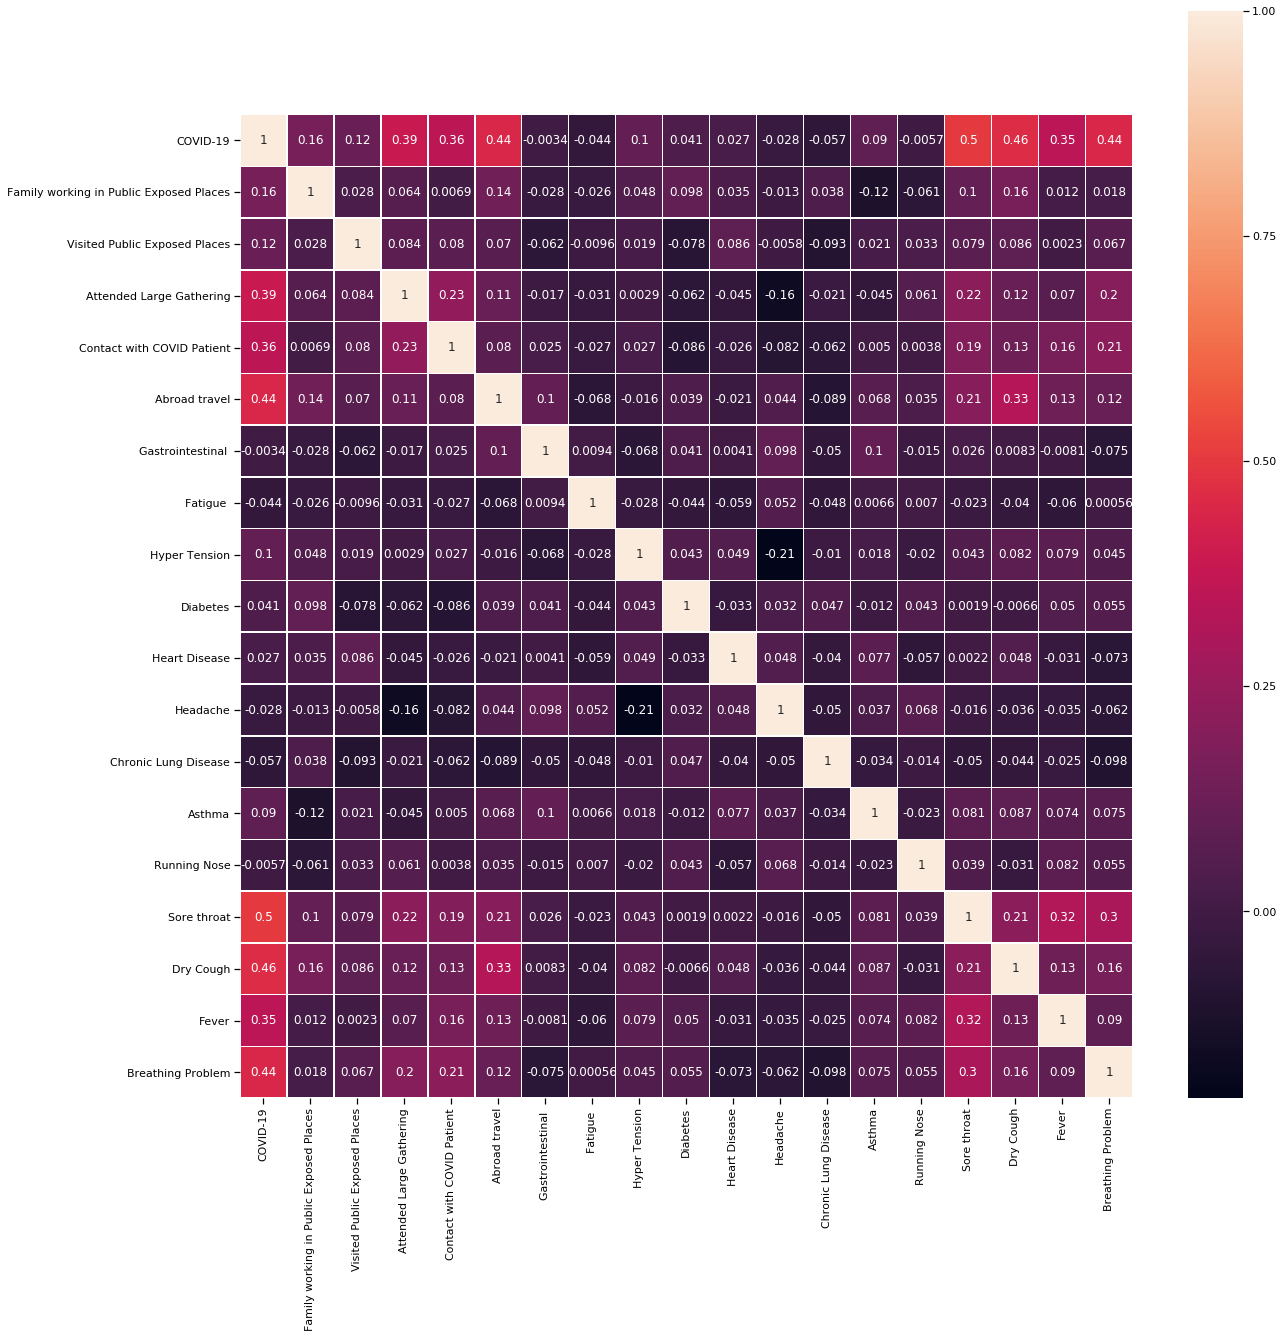

In [81]:
import seaborn as sn
import matplotlib.pyplot as plt 

sn.set_context('notebook')

# Plot
plt.figure(figsize=(20,20))
ax = sn.heatmap(df.corr(), annot=True, linewidth=0.5)
ax.set_xlim([19,0])
ax.set_ylim([0,21])
plt.show()

TechLabs 2020-2021, AI FOR GOOD